In [7]:
%pip install pandas
%pip install influxdb
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---
## Inicialización


Importamos las librerías que necesitaremos

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
## Procesamiento y tratamiento de los datos


In [35]:
df = pd.read_csv("data/KEU2A21_to_KW40.csv")
df

C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_23764\1543821001.py:1: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/KEU2A21_to_KW40.csv")


,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement
0,NaN,_result,0,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-22T10:25:55.074652275Z,0,122110RB1_FB_SEAT_STAT.122110RB1.N_NOK,KEU2A21-----BS1---KFU1
1,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-22T10:25:55.074650463Z,15,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
2,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-23T02:38:29.758467912Z,16,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
3,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-23T02:39:49.747209686Z,17,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
4,NaN,_result,1,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-23T02:41:09.752913148Z,18,122110RB1_FB_SEAT_STAT.122110RB1.N_OK,KEU2A21-----BS1---KFU1
...,...,...,...,...,...,...,...,...,...
3809858,NaN,_result,50,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-30T19:44:56.600146058Z,302.5087890625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...,KEU2A21-----BS1---KFU1
3809859,NaN,_result,50,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-30T19:44:57.607892185Z,302.525390625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...,KEU2A21-----BS1---KFU1
3809860,NaN,_result,50,2024-09-01T00:00:00Z,2024-09-30T20:33:23.826336718Z,2024-09-30T19:44:58.603313602Z,302.5419921875,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...,KEU2A21-----BS1---KFU1
3809861,NaN,result,table,_start,_stop,_time,_value,_field,_measurement


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809863 entries, 0 to 3809862
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    float64
 1   result        object 
 2   table         object 
 3   _start        object 
 4   _stop         object 
 5   _time         object 
 6   _value        object 
 7   _field        object 
 8   _measurement  object 
dtypes: float64(1), object(8)
memory usage: 261.6+ MB


Nos quedamos en nuestro dataset con las columnas que nos interesan, en este caso son las columnas de timestamp, valor, y la variable.
Ahora tenemos un dataset de dimensionalidad muy pequeña debido a que todos los datos están distribuidos en diferentes timestamp. Ahora deberemos organizarlos para tener diferentes instantes de tiempo y generar una columna por variable, de modo que obtengamos el estado de la máquina y de su eficiencia global a lo largo del tiempo

In [36]:
df = df[['_time','_value','_field']]
df = df.dropna()
df

,_time,_value,_field
0,2024-09-22T10:25:55.074652275Z,0,122110RB1_FB_SEAT_STAT.122110RB1.N_NOK
1,2024-09-22T10:25:55.074650463Z,15,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
2,2024-09-23T02:38:29.758467912Z,16,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
3,2024-09-23T02:39:49.747209686Z,17,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
4,2024-09-23T02:41:09.752913148Z,18,122110RB1_FB_SEAT_STAT.122110RB1.N_OK
...,...,...,...
3809858,2024-09-30T19:44:56.600146058Z,302.5087890625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...
3809859,2024-09-30T19:44:57.607892185Z,302.525390625,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...
3809860,2024-09-30T19:44:58.603313602Z,302.5419921875,122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Pro...
3809861,_time,_value,_field


### Conversión del dataset

Como hemos comentado anteriormente, nos toca hacer resample de pandas para gestionar las series de tiempo que se nos originan debido a la arquitectura/definición de nuestra aplicación

In [37]:
# Convertir la columna '_time' a tipo datetime
df['_time'] = pd.to_datetime(df['_time'], errors='coerce')

# Eliminar las filas donde haya tenido un error de conversión de tiempo (_time)
# Esto lo debo hacer debido a que al aplicar el 'coerce' puedo obtener NaT o NaN al encontrarse Pandas un valor que no sea capaz de convertir
df = df.dropna(subset=['_time'])

# Buscar filas duplicadas basadas en '_time' y '_field'
# y conservar solo la última entrada para cada combinación
df = df.drop_duplicates(subset=['_time', '_field'], keep='last')

# Pivotar el DataFrame para tener una columna por cada '_field'
df_pivot = df.pivot(index='_time', columns='_field', values='_value')

# Rellenar los valores NaN con el último valor válido
df_filled = df_pivot.fillna(method='ffill')

# Agrupar por segundos y consolidar en una única fila por segundo
# Aquí usamos el primer valor no nulo (se puede ajustar según lo necesites)
df_resampled = df_filled.resample('1S').first()

# Guardar el DataFrame agrupado a un archivo CSV
df_resampled.to_csv('data/KEU2A21_to_KW40_grouped.csv', index=True)

print("Datos resampleados y guardados en 'data/KEU2A21_to_KW40_grouped.csv'.")


Datos resampleados y guardados en 'data/KEU2A21_to_KW40_grouped.csv'.


Guardamos el dataset en un csv y seguimos analizando nuestro dataframe ahora resampleado

In [13]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727649 entries, 2024-09-22 10:25:55+00:00 to 2024-09-30 20:33:23+00:00
Freq: S
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                   722395 non-null  object 
 1   122110RB1_FB_SEAT_STAT.122110RB1.N_OK                    722395 non-null  object 
 2   122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                 722395 non-null  object 
 3   122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                  722395 non-null  object 
 4   122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                  722395 non-null  object 
 5   122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                 722395 non-null  object 
 6   122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad             722395 non-null  object 
 7   122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA 

Vemos la distribución de nuestro dataset y rápidamente nos damos cuenta como la misma tiene coherencia, debido a que hemos formado 52 columnas que corresponden a las variables que teníamos en nuestro bloque de datos del PLC
Por otro lado, se observa como hay valores faltantes, cerca de unos 5.000, debido a que el valor de valores no nulos es menor al del tamanyo del dataset. Vamos a tratarlos...

### Valores nulos

In [14]:
df_resampled.isnull().sum()

_field
122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                     5254
122110RB1_FB_SEAT_STAT.122110RB1.N_OK                      5254
122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                   5254
122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                    5254
122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                    5254
122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                   5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad               5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA             5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad        5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE                   5254
122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento           5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad             5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad      5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia          5254
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE                 5254
122110RB1_FB_SEAT_STAT.122110RB1.

Como se puede observar, obtenemos un total de 5.254.
Revisando el dataset, se observan que son filas completamente vacias, por lo que se decide suprimir estas.
Ademas, el porcentaje respecto al total de filas es muy bajo, por lo que no nos repercute

In [38]:
df_oee = df_resampled.dropna()
print(df_oee.info())
print(df_oee.isnull())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 722395 entries, 2024-09-22 10:25:55+00:00 to 2024-09-30 20:33:23+00:00
Data columns (total 52 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                   722395 non-null  object 
 1   122110RB1_FB_SEAT_STAT.122110RB1.N_OK                    722395 non-null  object 
 2   122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                 722395 non-null  object 
 3   122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                  722395 non-null  object 
 4   122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                  722395 non-null  object 
 5   122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                 722395 non-null  object 
 6   122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad             722395 non-null  object 
 7   122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA         

Ahora podemos garantizar que el dataset no tiene valores faltantes debido a que su tamanyo y el de valores no nulos coincide

In [16]:
df_oee.dtypes

_field
122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                      object
122110RB1_FB_SEAT_STAT.122110RB1.N_OK                       object
122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                    object
122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                     object
122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                     object
122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                    object
122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad                object
122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA              object
122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad        float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE                   float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento            object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad              object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad       object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia           object
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE             

Viendo la distribución de tipo de datos, de forma automatica, python nos ha asignado tipos de datos que no coinciden con la realidad
Ahora vamos a tratar de convertir estos valores para que así podamos asegurar que en el futuro no tengamos problemas de conversión, análisis, procesado, etc

In [39]:
# Modifico los tipos de datos de las columnas según la definición del bloque de datos del PLC

# Mapeo de columnas a sus tipos de datos
type_mapping = {
    '122110RB1_FB_SEAT_STAT.122110RB1.N_NOK': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_OK': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_PROD': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.N_TREND': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_SOLL': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_Eficiencia': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Stoe_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_TC_OBJ': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_Calidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_Disponibilidad': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_Eficiencia': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.SP_Warn_OEE': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Averia': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_EnCiclo_CO': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_IN_LOG_IN': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_IN_LOG_OUT': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Instal_en_BREAK': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Instal_en_PAUSA': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.ST_Instal_en_seq': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.Status_W_Stoe': 'int',
    '122110RB1_FB_SEAT_STAT.122110RB1.Stoe': 'bool',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrARG': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrInstalación': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrPlataforma': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.StrSubzona': 'str',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Averia_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Averia_ACU': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Ciclo_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Ciclo_Logistico': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Ciclo_Medio': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_IN_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_IN_ACU': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_OUT_ACT': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_LOG_OUT_ACU': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Mem_Ciclo_Ant': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Neto': 'float',  
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Neto_Disponible': 'float',  
    '122110RB1_FB_SEAT_STAT.122110RB1.T_Paro_No_Programado': 'float',
    '122110RB1_FB_SEAT_STAT.122110RB1.Version_FB': 'str',
}

# Actualizar tipos de datos en el DataFrame
for column, dtype in type_mapping.items():
    if column in df_oee.columns:
        try:
            df_oee[column] = df_oee[column].astype(dtype)
        except ValueError:
            print(f"Error al convertir la columna {column} a {dtype}")

# Verifica los tipos de datos después de la conversión
print(df_oee.dtypes)


C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_23764\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oee[column] = df_oee[column].astype(dtype)
C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_23764\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oee[column] = df_oee[column].astype(dtype)
C:\Users\t32p1tx\AppData\Local\Temp\1\ipykernel_23764\1593188576.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

_field
122110RB1_FB_SEAT_STAT.122110RB1.N_NOK                       int32
122110RB1_FB_SEAT_STAT.122110RB1.N_OK                        int32
122110RB1_FB_SEAT_STAT.122110RB1.N_PAUSA                     int32
122110RB1_FB_SEAT_STAT.122110RB1.N_PROD                      int32
122110RB1_FB_SEAT_STAT.122110RB1.N_SOLL                      int32
122110RB1_FB_SEAT_STAT.122110RB1.N_TREND                     int32
122110RB1_FB_SEAT_STAT.122110RB1.POR_Calidad               float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_D_TECNICA             float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_Disponibilidad        float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_OEE                   float64
122110RB1_FB_SEAT_STAT.122110RB1.POR_Rendimiento           float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Calidad             float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Disponibilidad      float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_Eficiencia          float64
122110RB1_FB_SEAT_STAT.122110RB1.SP_OK_OEE             

## Descripción del nuevo dataset

Seguimos obteniendo más información respecto a nuestro dataset a través de la instrucción .info() de pandas, la cual nos arroja información muy relevante relacionada con la estadística descriptiva de nuestro problema

In [40]:
# Eliminar el prefijo de las columnas en df_oee
df_oee.columns = df_oee.columns.str.replace(r'^122110RB1_FB_SEAT_STAT\.122110RB1\.', '', regex=True)
# Esto me permitira visualizar mejor los datos

df_oee.describe()

_field,N_NOK,N_OK,N_PAUSA,N_PROD,N_SOLL,N_TREND,POR_Calidad,POR_D_TECNICA,POR_Disponibilidad,POR_OEE,...,T_Ciclo_Logistico,T_Ciclo_Medio,T_LOG_IN_ACT,T_LOG_IN_ACU,T_LOG_OUT_ACT,T_LOG_OUT_ACU,T_Mem_Ciclo_Ant,T_Neto,T_Neto_Disponible,T_Paro_No_Programado
count,722395.0,722395.000000,722395.0,722395.000000,722395.0,722395.000000,722395.0,722395.000000,722395.000000,722395.000000,...,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,722395.0,722395.000000
mean,0.0,40.996881,0.0,40.996881,118.0,214.444239,100.0,96.329509,45.078241,28.769037,...,17.078432,2.022358,5.843646,10.752422,183.081643,258.223775,1.465802,171.107406,0.0,289.696211
std,0.0,44.026039,0.0,44.026039,0.0,179.815361,0.0,3.715320,16.500104,17.421590,...,45.631935,1.948914,12.912243,19.569366,283.153147,290.261470,1.472761,82.916159,0.0,266.457301
min,0.0,0.000000,0.0,0.000000,118.0,-794.000000,100.0,78.468201,0.094994,0.094368,...,1.448065,1.009277,0.000488,0.000488,0.000244,0.000977,0.959961,1.276855,0.0,0.676758
25%,0.0,0.000000,0.0,0.000000,118.0,186.000000,100.0,94.391655,32.958733,5.822749,...,3.131491,1.294147,0.023926,0.186035,0.751953,72.111816,1.263428,122.404785,0.0,98.877930
50%,0.0,21.000000,0.0,21.000000,118.0,273.000000,100.0,97.558853,44.149681,32.000618,...,3.999923,1.337717,0.075928,0.401367,29.832764,148.161133,1.267578,177.452148,0.0,207.447266
75%,0.0,82.000000,0.0,82.000000,118.0,328.000000,100.0,98.954620,58.152332,40.875204,...,21.982932,1.593295,0.091309,4.747070,287.067261,322.638367,1.410645,214.461914,0.0,340.566406
max,0.0,134.000000,0.0,134.000000,118.0,328.000000,100.0,99.999794,93.675980,88.393852,...,1356.393555,8.373262,114.339844,114.754883,1353.568359,1435.983398,50.227539,329.981934,0.0,1435.983398


Esta herramienta es especialmente útil, nos permite conocer como se ha distribuido nuestra data y sacar conclusiones sin tener un contexto o conocer realmente la instalación real
- **POR_Disponibilidad**: 
  - **Media**: 45.08% - Muestra que el equipo tiene una disponibilidad moderada.
  - **Mínimo**: 0.09% - Puede indicar períodos de inactividad extrema.
  - **Máximo**: 93.68% - Refleja momentos en que el equipo estuvo casi siempre disponible.

- **POR_OEE**: 
  - **Media**: 28.77% - Un porcentaje bajo sugiere que la eficiencia global del equipo necesita mejoras.
  - **Mínimo**: 0.09% - Indica momentos críticos de ineficiencia.
  - **Máximo**: 88.39% - Refleja el mejor desempeño observado.

- **T_Ciclo_ACT**: 
  - **Media**: 2.38 - Indica un ciclo actual relativamente corto.
  - **Mínimo**: 0.00024 - Puede señalar un ciclo anómalo.
  - **Máximo**: 127.00 - Refleja un ciclo excepcionalmente largo.

- **T_Ciclo_Logistico**: 
  - **Media**: 17.08 - Un tiempo logístico razonable, aunque se puede optimizar.
  - **Máximo**: 1356.39 - Podría indicar ineficiencias en el flujo logístico.

- **T_Ciclo_Medio**: 
  - **Media**: 2.02 - Sugerente de un buen tiempo medio de ciclo.
  - **Máximo**: 8.37 - Muestra que hay espacio para mejorar la eficiencia.

- **T_LOG_IN_ACT**: 
  - **Media**: 5.84 - Un tiempo logístico de entrada aceptable.

- **T_LOG_OUT_ACT**: 
  - **Media**: 10.75 - Refleja un tiempo logístico de salida que puede ser mejorado.

- **T_Mem_Ciclo_Ant**: 
  - **Media**: 1.47 - Indica que el tiempo de ciclo anterior fue significativamente menor, lo que podría sugerir ineficiencia actual.


# Visualización gráfica y análisis descriptivo de los datos

Una de las primeras tareas que debemos hacer con nuestro saber es conocer un poco más acerca de los datos que lo forman. Esto es crucial para sacar unas primeras sensaciones sobre que están diciendo nuestros datos, como se distribuyen y si requieren de algún otro preprocesado

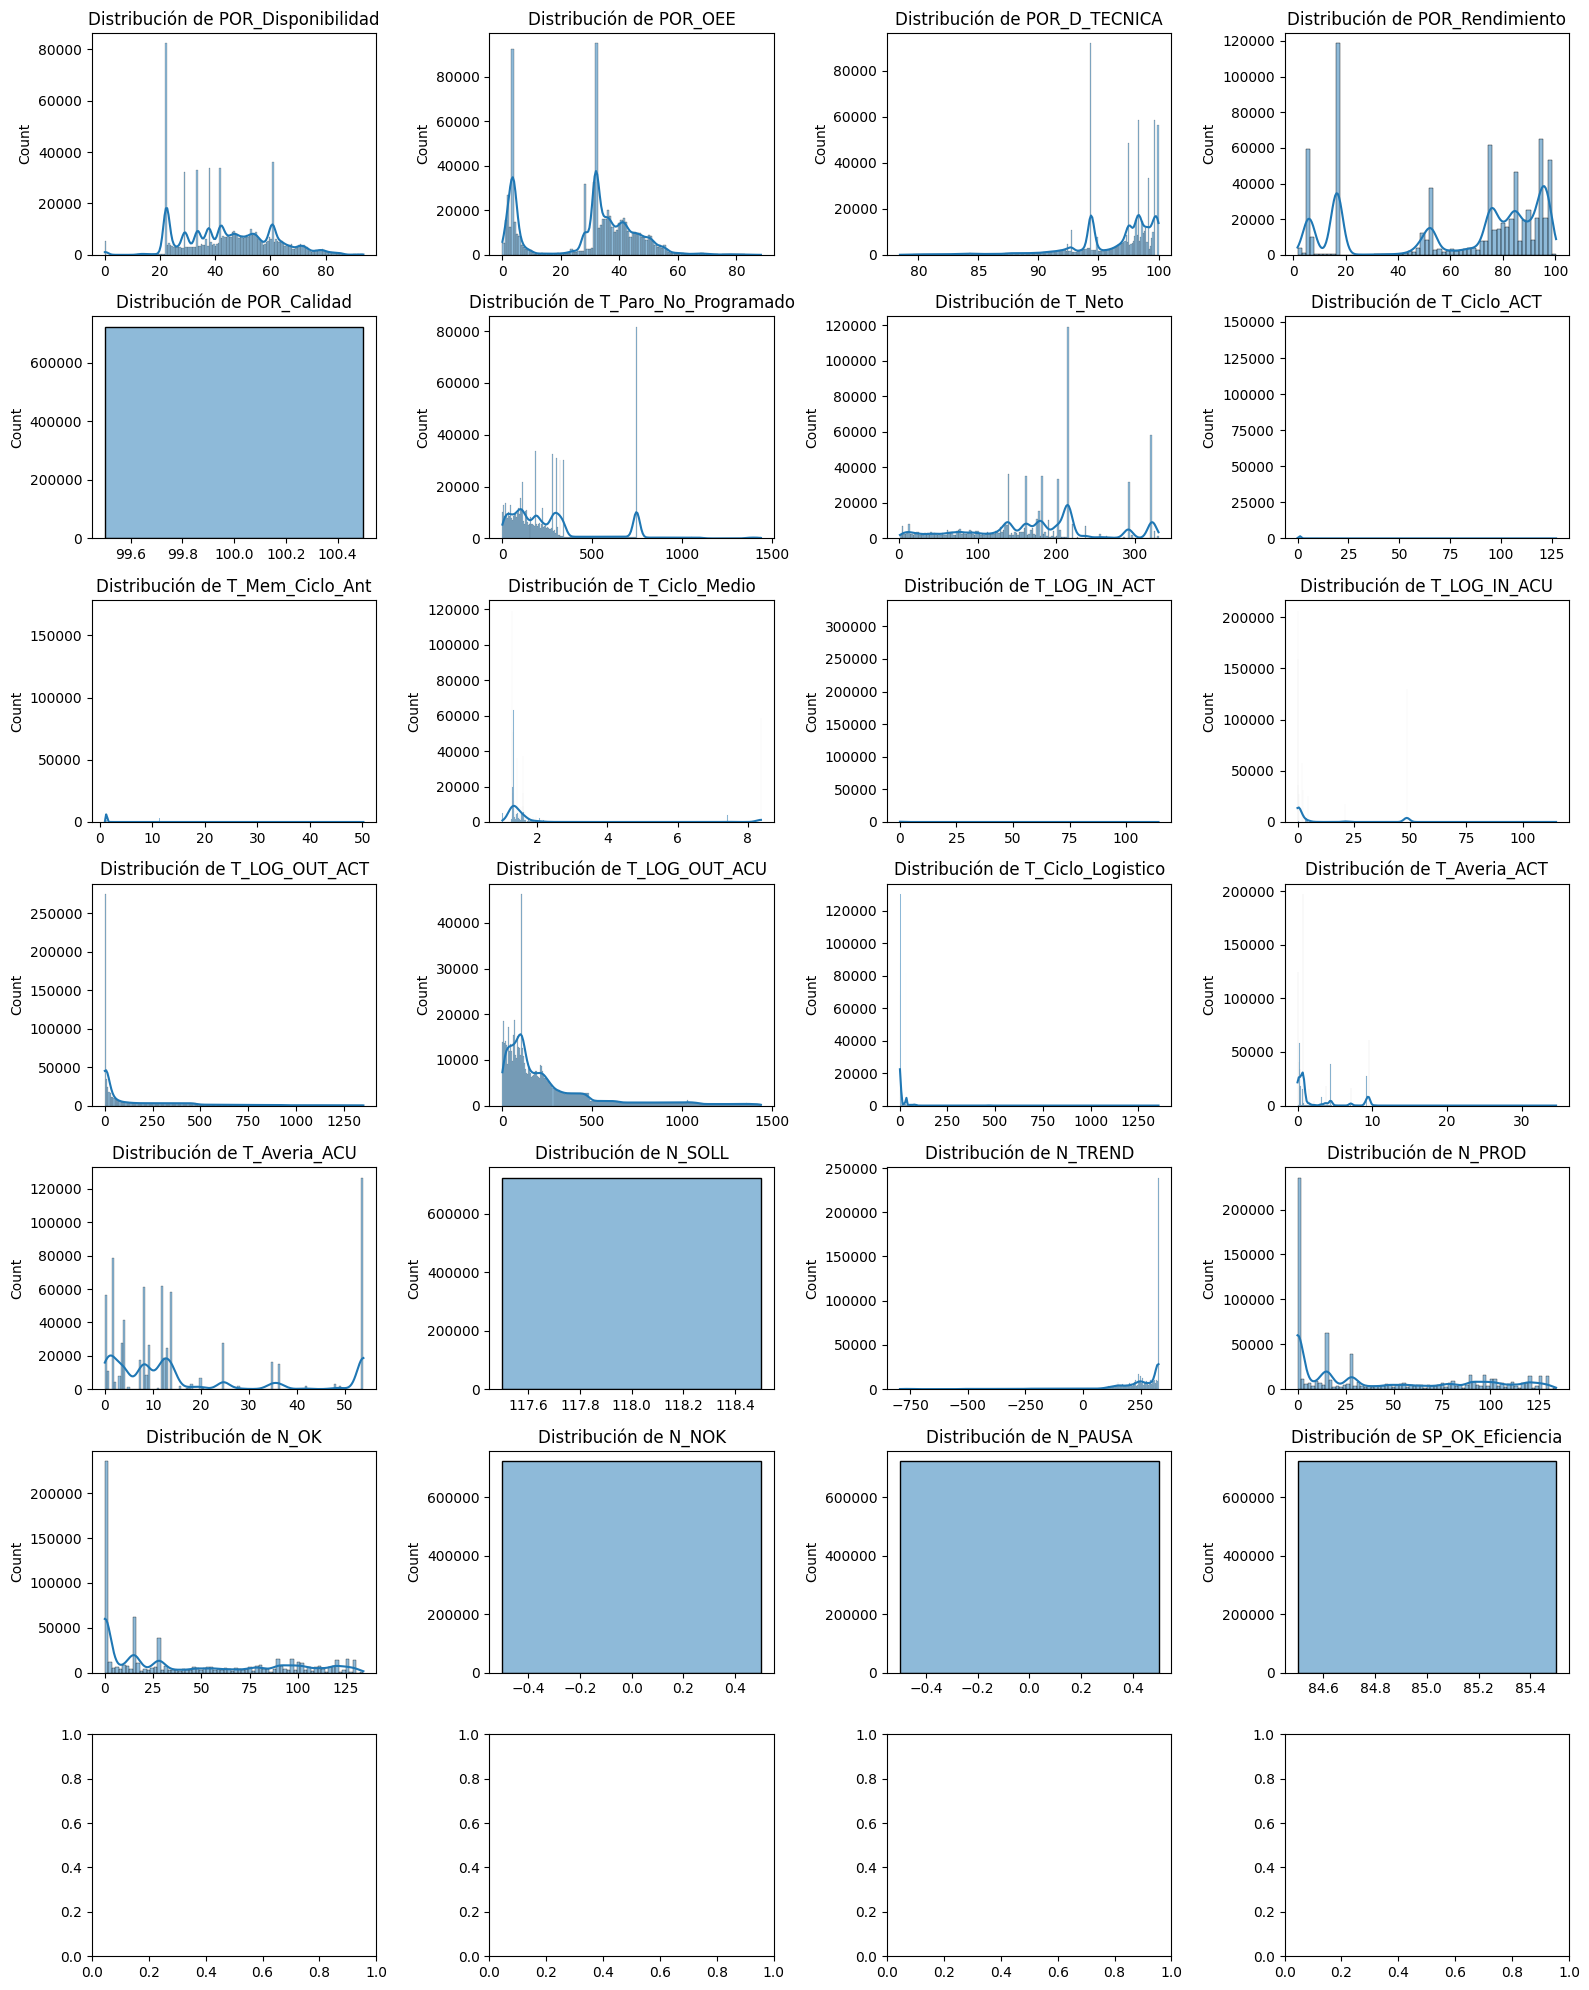

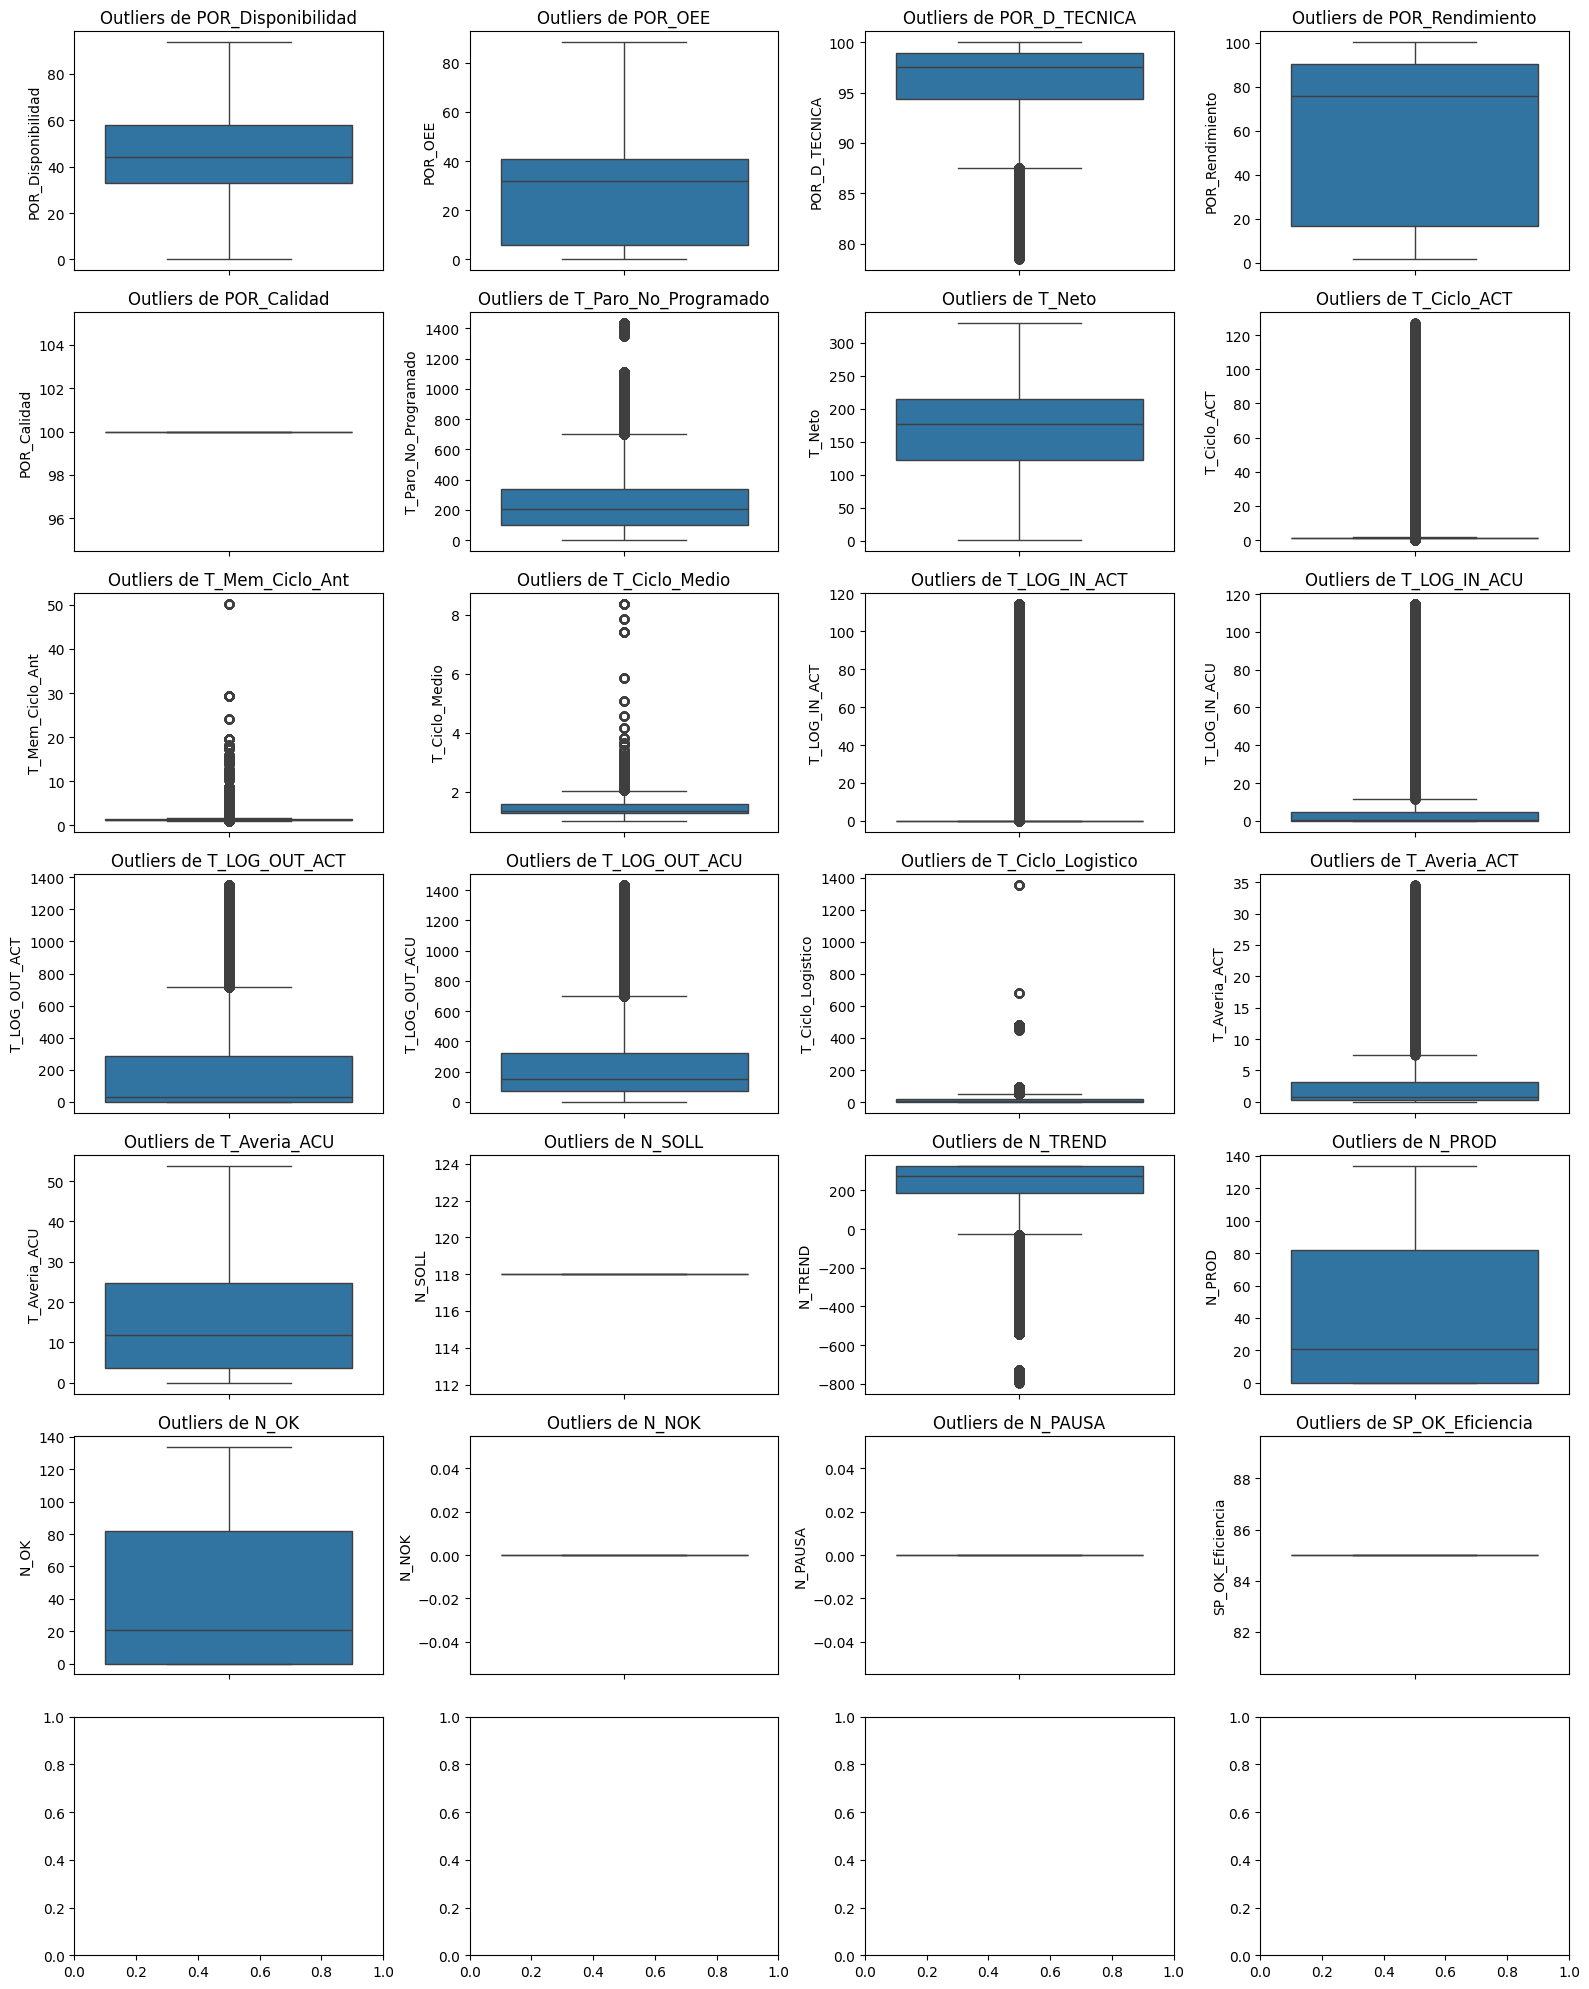

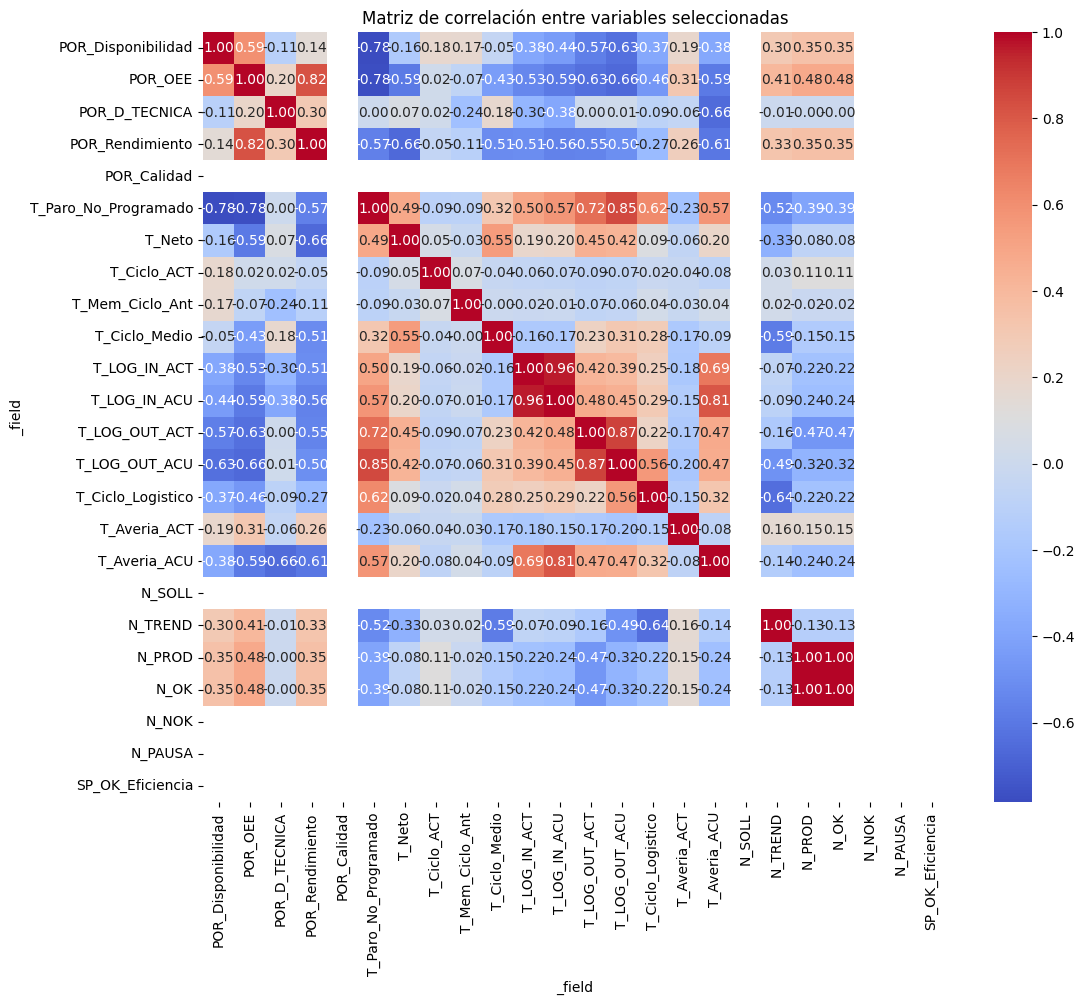

_field,POR_Disponibilidad,POR_OEE,POR_D_TECNICA,POR_Rendimiento,POR_Calidad,T_Paro_No_Programado,T_Neto,T_Ciclo_ACT,T_Mem_Ciclo_Ant,T_Ciclo_Medio,...,T_Ciclo_Logistico,T_Averia_ACT,T_Averia_ACU,N_SOLL,N_TREND,N_PROD,N_OK,N_NOK,N_PAUSA,SP_OK_Eficiencia
count,722395.000000,722395.000000,722395.000000,722395.000000,722395.0,722395.000000,722395.000000,722395.000000,722395.000000,722395.000000,...,722395.000000,722395.000000,722395.000000,722395.0,722395.000000,722395.000000,722395.000000,722395.0,722395.0,722395.0
mean,45.078241,28.769037,96.329509,62.087602,100.0,289.696211,171.107406,2.382255,1.465802,2.022358,...,17.078432,2.191518,17.850034,118.0,214.444239,40.996881,40.996881,0.0,0.0,85.0
std,16.500104,17.421590,3.715320,33.020876,0.0,266.457301,82.916159,8.078595,1.472761,1.948914,...,45.631935,3.299658,18.854864,0.0,179.815361,44.026039,44.026039,0.0,0.0,0.0
min,0.094994,0.094368,78.468201,1.692147,100.0,0.676758,1.276855,0.000244,0.959961,1.009277,...,1.448065,0.000244,0.000977,118.0,-794.000000,0.000000,0.000000,0.0,0.0,85.0
25%,32.958733,5.822749,94.391655,16.711594,100.0,98.877930,122.404785,1.258789,1.263428,1.294147,...,3.131491,0.267334,3.613281,118.0,186.000000,0.000000,0.000000,0.0,0.0,85.0
50%,44.149681,32.000618,97.558853,75.576935,100.0,207.447266,177.452148,1.267578,1.267578,1.337717,...,3.999923,0.733398,11.717285,118.0,273.000000,21.000000,21.000000,0.0,0.0,85.0
75%,58.152332,40.875204,98.954620,90.165154,100.0,340.566406,214.461914,1.412109,1.410645,1.593295,...,21.982932,3.170898,24.725586,118.0,328.000000,82.000000,82.000000,0.0,0.0,85.0
max,93.675980,88.393852,99.999794,100.246277,100.0,1435.983398,329.981934,127.004395,50.227539,8.373262,...,1356.393555,34.589844,53.840820,118.0,328.000000,134.000000,134.000000,0.0,0.0,85.0


In [14]:
# Selección de variables clave para análisis descriptivo y detección de outliers
variables_interes = [
    'POR_Disponibilidad', 'POR_OEE', 'POR_D_TECNICA', 'POR_Rendimiento', 'POR_Calidad',
    'T_Paro_No_Programado', 'T_Neto', 'T_Ciclo_ACT', 'T_Mem_Ciclo_Ant', 'T_Ciclo_Medio', 
    'T_LOG_IN_ACT', 'T_LOG_IN_ACU', 'T_LOG_OUT_ACT', 'T_LOG_OUT_ACU', 'T_Ciclo_Logistico', 
    'T_Averia_ACT', 'T_Averia_ACU', 'N_SOLL', 'N_TREND', 'N_PROD', 'N_OK', 'N_NOK', 
    'N_PAUSA', 'SP_OK_Eficiencia'
]

# Filtrar solo las columnas de interés
df_subset = df_oee[variables_interes]

# Análisis descriptivo
descripcion = df_subset.describe()

# Graficar histogramas para ver distribución de cada variable
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.histplot(df_subset[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Graficar boxplots para observar outliers
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.boxplot(data=df_subset[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Outliers de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 10))
correlacion = df_subset.corr()
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()

descripcion


## Reexploración tras análisis gráfico

Analizando la matriz de correlaciones y la tabla de describe. Rápidamente se obtienen las siguientes conclusiones:
- No tiene sentido analizar las variables de N_NOK, N_PAUSA, SP_OK_EFICIENCIA, N_SOLL y POR_CALIDAD. Son variables que carecen de variabilidad. Por ejemplo, la mesa de trabajo a estudiar no determina si el ciclo es OK/NOK, por lo tanto, las variables relacionadas con la calidad de la estación. Por otro lado, variables como N_PAUSA no tienen ningún valor válido, puede ser que no se escriban en el PLC o no se estén calculando correctamente.
- Analizando la matriz también se observa que N_PROD y NOK tienen una relación directa. Esto nos sugiere eliminar una de las dos para así reducir la dimensionalidad de nuestro dataset --> N_OK = N_PROD
- Ocurre algo semejante con la variable de tiempos logísticos de entrada. Cuentan con un 0.96 de relación positiva, por lo que podríamos prescindir de una de ellas.
- N_SOLL de momento no la vamos a suprimir ya que nos sirve para comparar valores de producción. Debido a que significa la producción objetivo del día
- Del análisis realizado hasta ahora se deciden suprimir las variables siguientes:
    - N_NOK
    - T_LOG_IN_ACU
    - N_OK
    - N_PAUSA
    - SP_OK_EFICIENCIA
    - POR_CALIDAD
    
- Se vuelven a generar los mismos gráficos para ver diferencias o resultado final

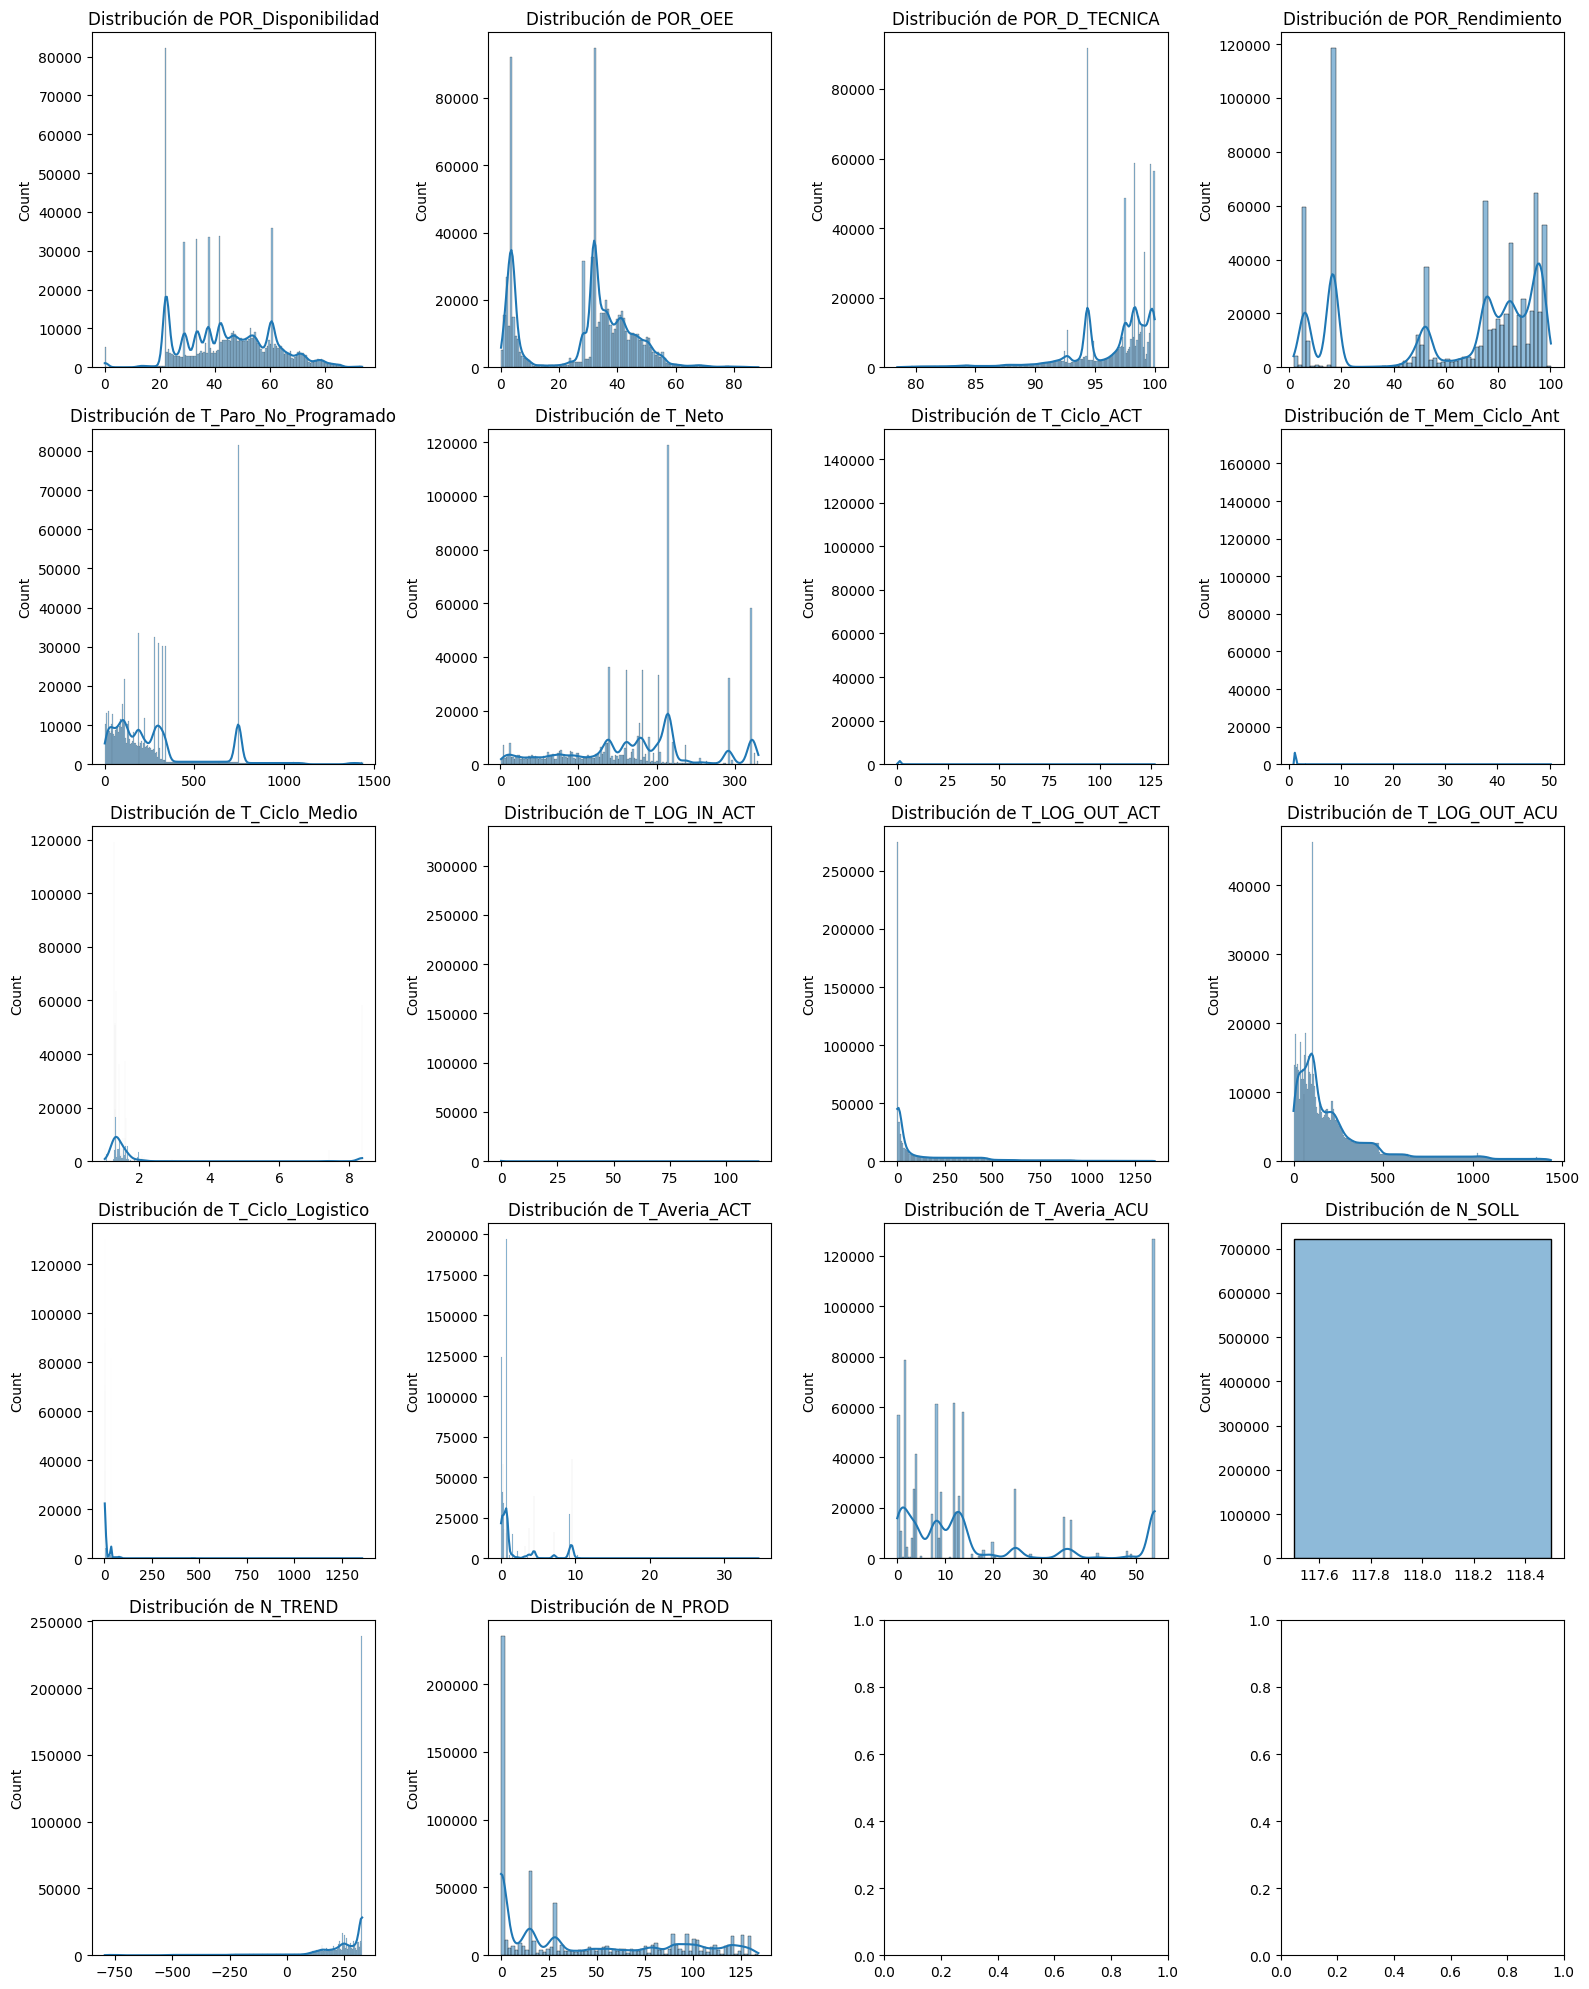

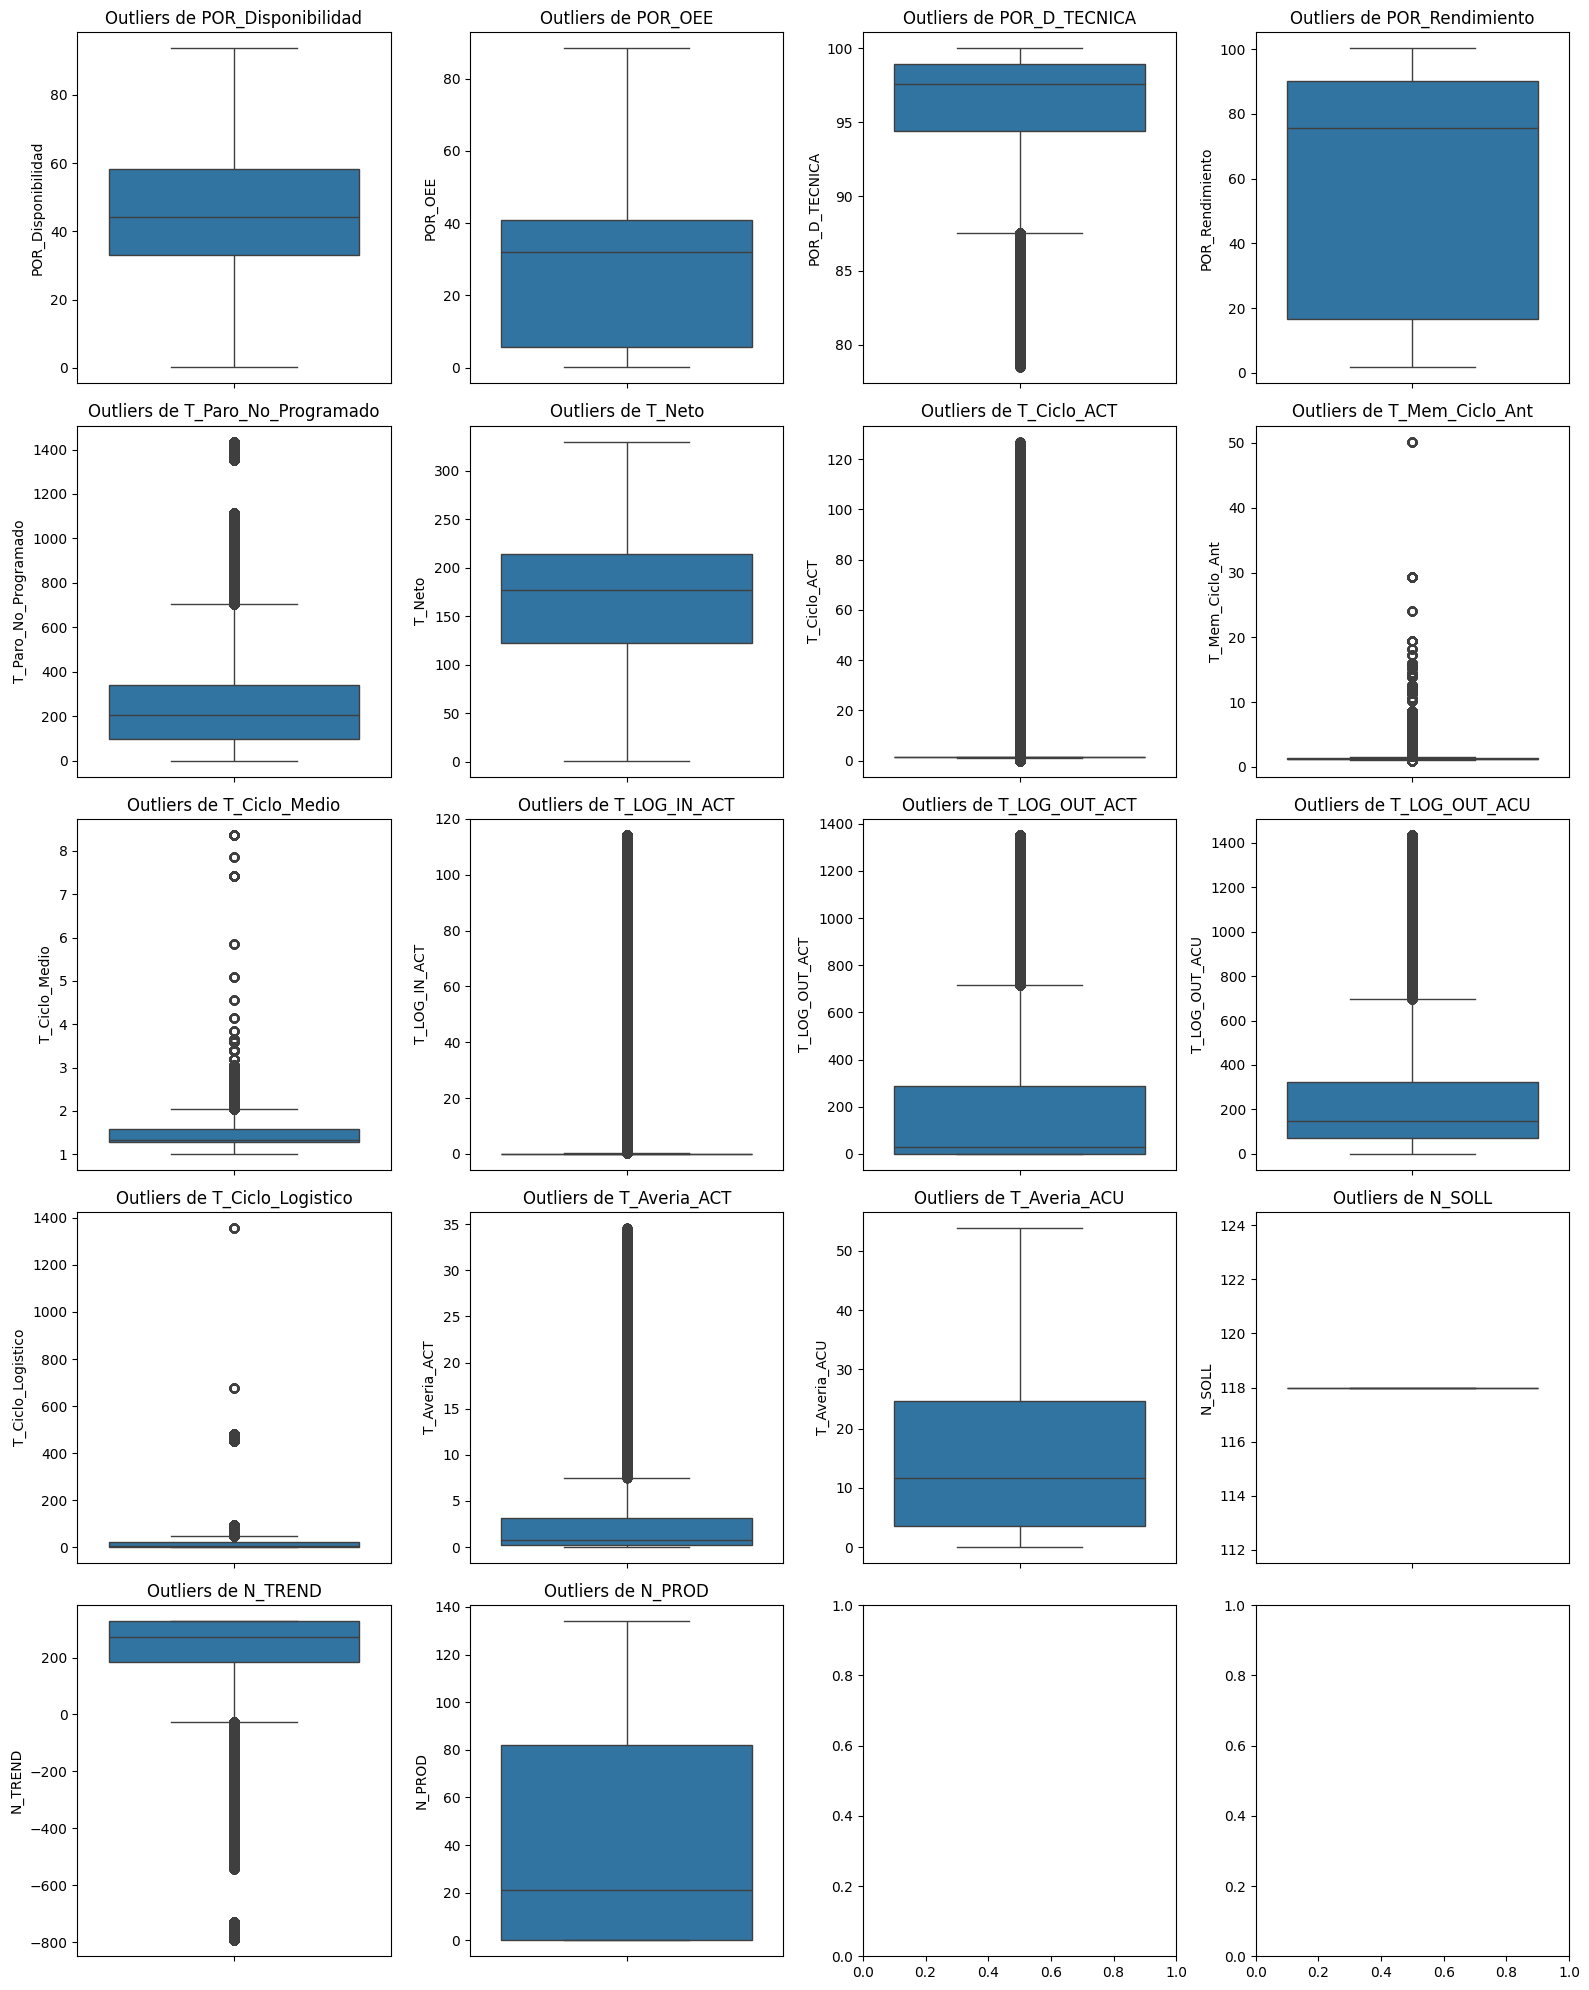

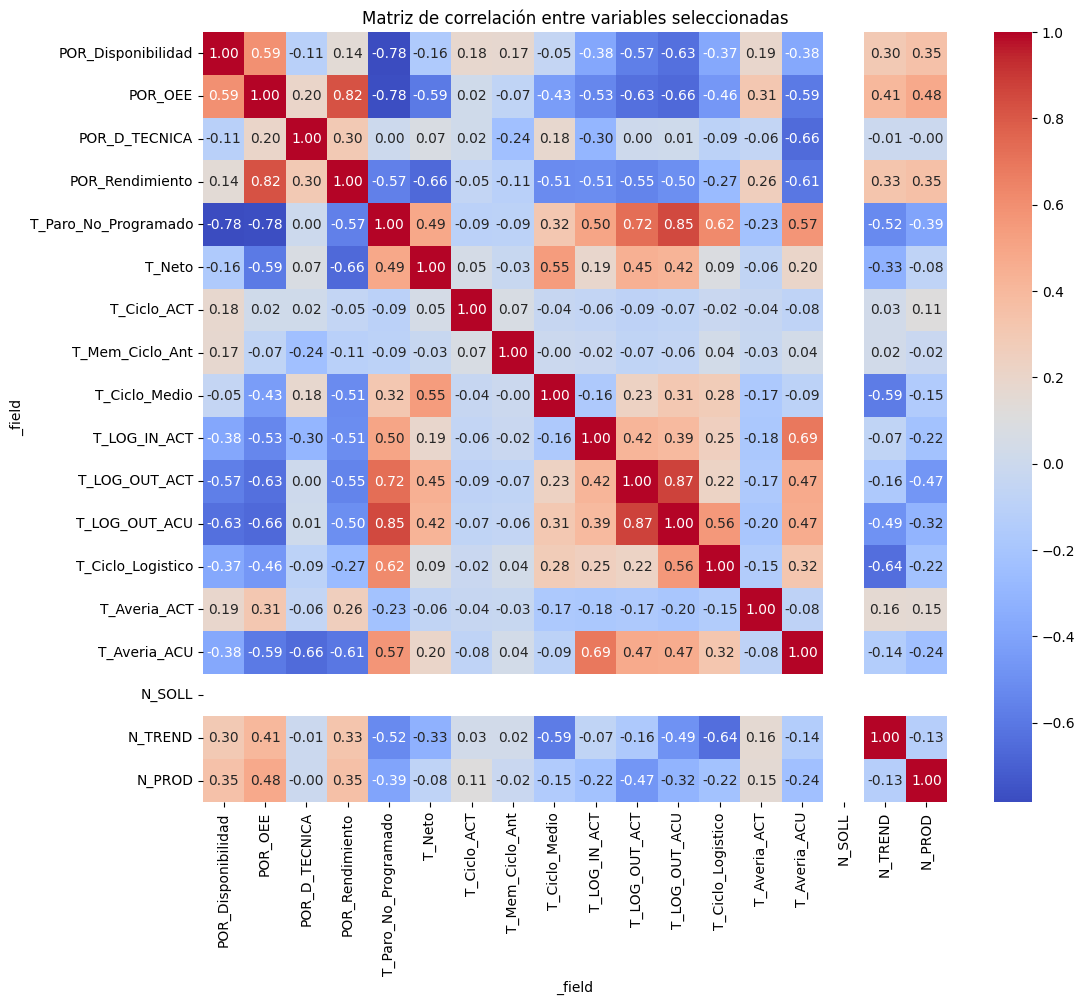

In [41]:
# Selección de variables clave para análisis descriptivo y detección de outliers
variables_interes = [
    'POR_Disponibilidad', 'POR_OEE', 'POR_D_TECNICA', 'POR_Rendimiento',
    'T_Paro_No_Programado', 'T_Neto', 'T_Ciclo_ACT', 'T_Mem_Ciclo_Ant', 'T_Ciclo_Medio', 
    'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_LOG_OUT_ACU', 'T_Ciclo_Logistico', 
    'T_Averia_ACT', 'T_Averia_ACU', 'N_SOLL', 'N_TREND', 'N_PROD'
]

# Filtrar solo las columnas de interés
df_oee = df_oee[variables_interes]

# Graficar histogramas para ver distribución de cada variable
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.histplot(df_oee[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Graficar boxplots para observar outliers
fig, axes = plt.subplots(len(variables_interes)//4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()
for i, col in enumerate(variables_interes):
    sns.boxplot(data=df_oee[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Outliers de {col}')
    axes[i].set_xlabel('')

# Ajuste de espaciado
plt.tight_layout()
plt.show()

# Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 10))
correlacion = df_oee.corr()
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()

In [42]:
df_oee

_field,POR_Disponibilidad,POR_OEE,POR_D_TECNICA,POR_Rendimiento,T_Paro_No_Programado,T_Neto,T_Ciclo_ACT,T_Mem_Ciclo_Ant,T_Ciclo_Medio,T_LOG_IN_ACT,T_LOG_OUT_ACT,T_LOG_OUT_ACU,T_Ciclo_Logistico,T_Averia_ACT,T_Averia_ACU,N_SOLL,N_TREND,N_PROD
_time,,,,,,,,,,,,,,,,,,
2024-09-22 10:25:55+00:00,80.104576,4.788990,96.517036,5.978423,79.764648,321.154907,1.412109,1.412109,8.373262,0.024292,10.870728,63.791260,26.727970,0.267334,13.963867,118,266,15
2024-09-22 10:25:56+00:00,80.101234,4.788591,96.517189,5.978423,79.781372,321.154907,1.412109,1.412109,8.373262,0.024292,10.887451,63.807983,26.729086,0.267334,13.963867,118,266,15
2024-09-22 10:25:57+00:00,80.097893,4.788393,96.517334,5.978423,79.798096,321.154907,1.412109,1.412109,8.373262,0.024292,10.904175,63.824707,26.730200,0.267334,13.963867,118,266,15
2024-09-22 10:25:58+00:00,80.094574,4.788195,96.517471,5.978423,79.814697,321.154907,1.412109,1.412109,8.373262,0.024292,10.920776,63.841309,26.731306,0.267334,13.963867,118,266,15
2024-09-22 10:25:59+00:00,80.091263,4.787994,96.517616,5.978423,79.831299,321.154907,1.412109,1.412109,8.373262,0.024292,10.937378,63.857910,26.732414,0.267334,13.963867,118,266,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 20:33:19+00:00,36.969650,33.333744,97.296104,90.165154,302.541992,177.452148,1.273438,1.273438,1.326140,0.213867,48.344727,48.328125,3.839953,9.187500,12.978516,118,328,0
2024-09-30 20:33:20+00:00,36.969650,33.333744,97.296104,90.165154,302.541992,177.452148,1.273438,1.273438,1.326140,0.213867,48.361328,48.344727,3.839953,9.187500,12.978516,118,328,0
2024-09-30 20:33:21+00:00,36.969650,33.333744,97.296104,90.165154,302.541992,177.452148,1.273438,1.273438,1.326140,0.213867,48.376953,48.361328,3.839953,9.187500,12.978516,118,328,0


Tras volver a analizar los gráficos podemos sacar algunas conclusiones más al respecto:
- **Gráfico de cajas**:
    - Los gráficos en T_Paro_No_Programado, `T_Ciclo_Medio, T_Ciclo_Logistico, T_Averia_ACT, y N_TREND`. Estos valores extremos podrían indicar eventos anómalos o problemas específicos en el proceso.
    - La variable `POR_D_TECNICA`, con la mayoría de sus valores concentrados en la parte alta de la caja, sugiere que en general, **el tiempo técnico es bastante alto**, pero hay algunos valores inusualmente bajos que destacan como outliers.

- **Gráficos de Distribución (Histogramas)**:
    - Las distribuciones de algunas variables, como `POR_Disponibilidad, POR_OEE, T_Neto, y T_Ciclo_ACT`, son asimétricas, lo cual puede reflejar diferencias significativas en los datos o una concentración en ciertos valores que predominan sobre otros.
    - Algunas variables muestran una distribución multimodal, como `POR_Disponibilidad y T_Paro_No_Programado`, sugiriendo la existencia de diferentes estados operativos o condiciones que impactan la variabilidad de estas métricas.
    - La variable `N_SOLL` muestra una distribución estrecha, probablemente con un solo valor constante, lo que implica que podría ser irrelevante para el análisis descriptivo o predictivo.

- **Matriz de Correlación**:
    - La matriz muestra relaciones fuertes y negativas entre variables como `POR_Disponibilidad y T_Paro_No_Programado`, lo que es esperable ya que una mayor disponibilidad implica menos tiempo de paro no programado.
    - Existe una correlación notable entre `T_Averia_ACT y T_Averia_ACU`, lo cual indica que los tiempos de avería actuales tienen una relación lógica con los acumulados.
    `POR_Rendimiento y POR_OEE` tienen una correlación positiva, lo que sugiere que mejorar el rendimiento contribuye directamente a mejorar el OEE.
    - Algunas correlaciones bajas entre variables, como `T_Ciclo_ACT y N_PROD`, podrían indicar que estas variables no están directamente relacionadas o que otras variables están influenciando su relación de manera más significativa.

## Gráficos de violín

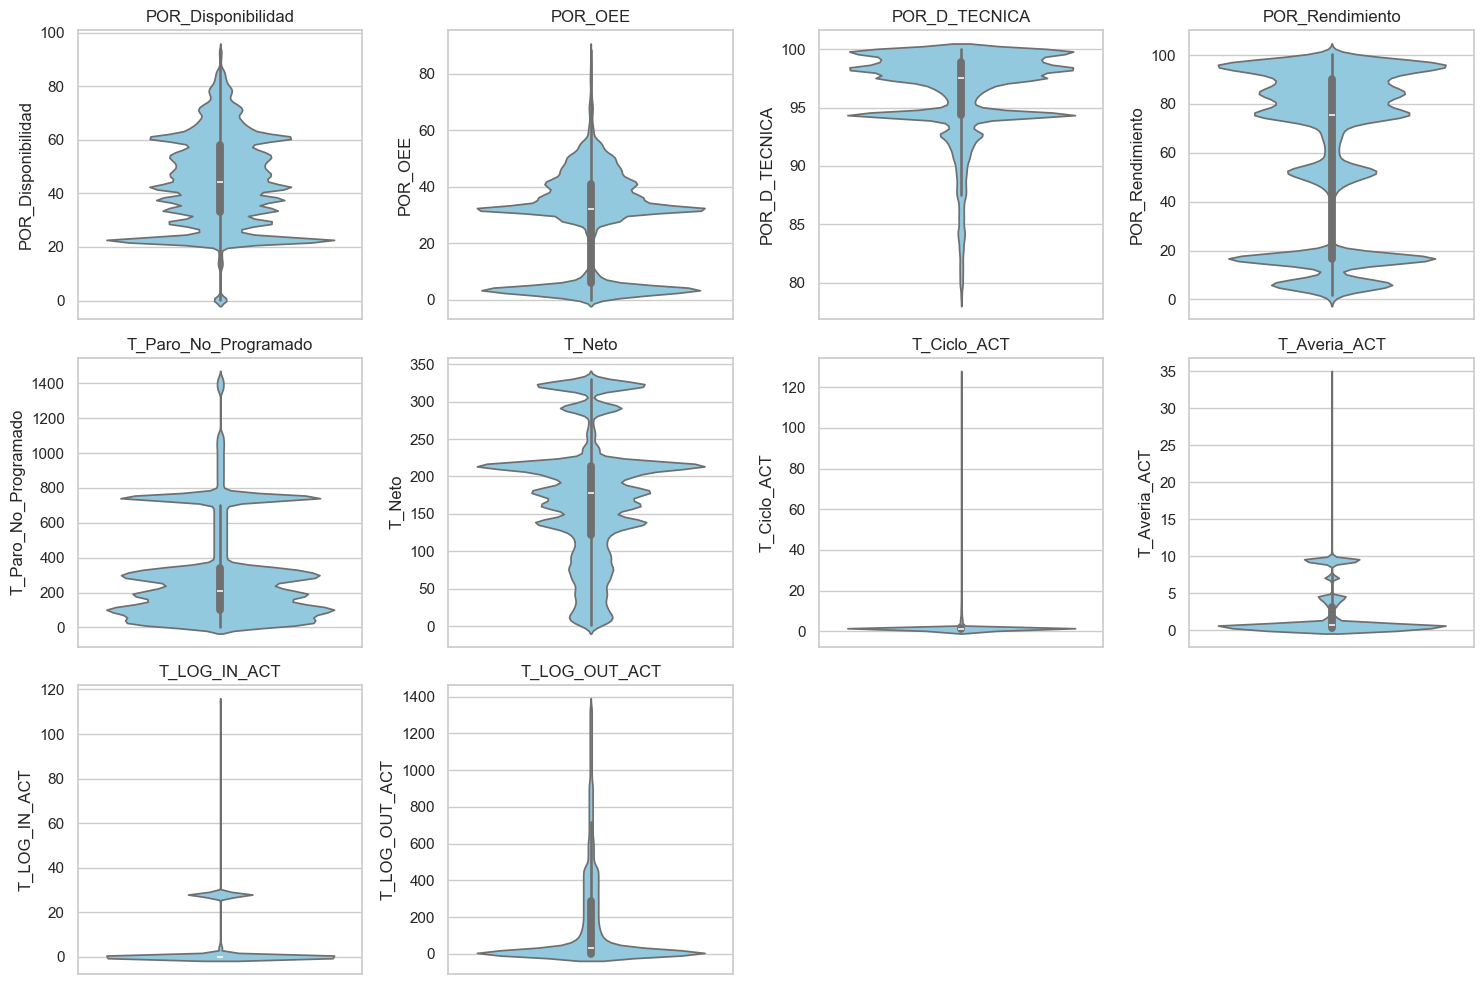

In [16]:
# Filtrando solo las columnas seleccionadas para análisis de gráfico de violín
variables_interes = [
    'POR_Disponibilidad', 'POR_OEE', 'POR_D_TECNICA', 'POR_Rendimiento',
    'T_Paro_No_Programado', 'T_Neto', 'T_Ciclo_ACT', 'T_Averia_ACT', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT']

df_oee = df_oee[variables_interes]

# Configuración de los gráficos de violín
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Generar gráficos de violín para cada variable
for i, column in enumerate(df_oee.columns, 1):
    plt.subplot(3, 4, i)
    sns.violinplot(data=df_oee, y=column, color="skyblue")
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [45]:
df_oee.reset_index(inplace=True)
df_oee.head()

_field,_time,POR_Disponibilidad,POR_OEE,POR_D_TECNICA,POR_Rendimiento,T_Paro_No_Programado,T_Neto,T_Ciclo_ACT,T_Mem_Ciclo_Ant,T_Ciclo_Medio,T_LOG_IN_ACT,T_LOG_OUT_ACT,T_LOG_OUT_ACU,T_Ciclo_Logistico,T_Averia_ACT,T_Averia_ACU,N_SOLL,N_TREND,N_PROD
0,2024-09-22 10:25:55+00:00,80.104576,4.788990,96.517036,5.978423,79.764648,321.154907,1.412109,1.412109,8.373262,0.024292,10.870728,63.791260,26.727970,0.267334,13.963867,118,266,15
1,2024-09-22 10:25:56+00:00,80.101234,4.788591,96.517189,5.978423,79.781372,321.154907,1.412109,1.412109,8.373262,0.024292,10.887451,63.807983,26.729086,0.267334,13.963867,118,266,15
2,2024-09-22 10:25:57+00:00,80.097893,4.788393,96.517334,5.978423,79.798096,321.154907,1.412109,1.412109,8.373262,0.024292,10.904175,63.824707,26.730200,0.267334,13.963867,118,266,15
3,2024-09-22 10:25:58+00:00,80.094574,4.788195,96.517471,5.978423,79.814697,321.154907,1.412109,1.412109,8.373262,0.024292,10.920776,63.841309,26.731306,0.267334,13.963867,118,266,15
4,2024-09-22 10:25:59+00:00,80.091263,4.787994,96.517616,5.978423,79.831299,321.154907,1.412109,1.412109,8.373262,0.024292,10.937378,63.857910,26.732414,0.267334,13.963867,118,266,15


## Análisis temporal

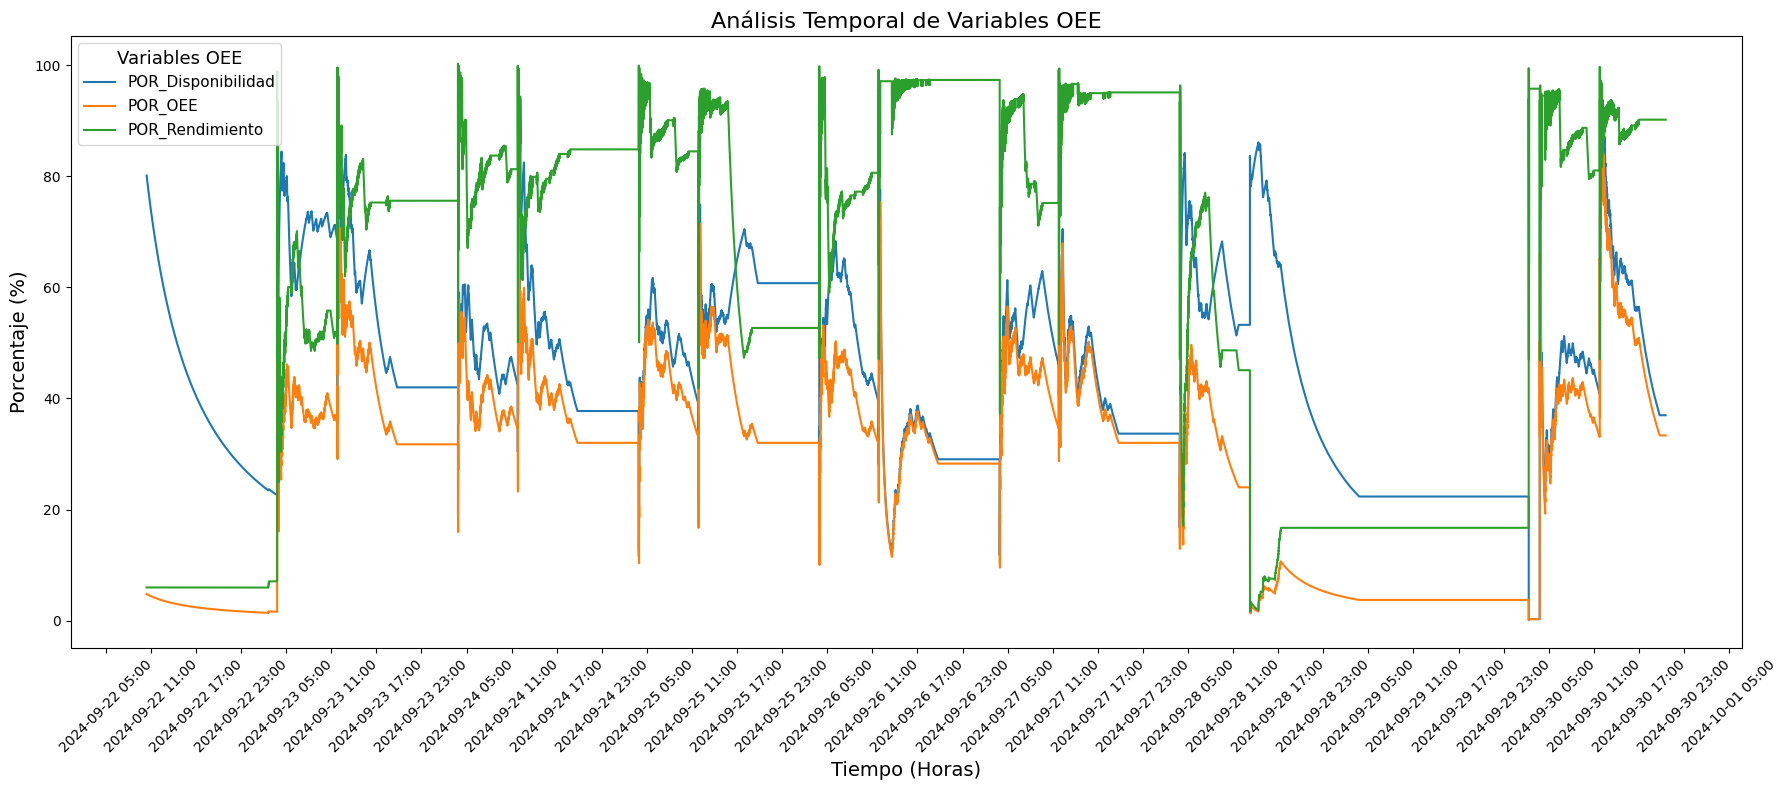

In [51]:
import matplotlib.dates as mdates

# Variables a graficar
variables_porcentajes = ['POR_Disponibilidad', 'POR_OEE', 'POR_Rendimiento']

# Graficar
plt.figure(figsize=(18, 8))
for col in variables_porcentajes:
    sns.lineplot(data=df_oee, x='_time', y=col, label=col)

# Mejorar la estética del gráfico
plt.title('Análisis Temporal de Variables OEE', fontsize=16)
plt.xlabel('Tiempo (Horas)', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.legend(title='Variables OEE', title_fontsize='13', fontsize='11')

# Ajustes adicionales en el eje x para visualizar por horas
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Intervalo de cada hora
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Formato día-hora
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para evitar superposición de elementos

plt.show()


Al graficar estas variables con lineas a lo largo de la semana, rápidamente somos capaces de detectar patrones, teniendo en cuenta que el día 23 es lunes y había producción hasta el día 28 en turno de noche

# LSTM Forecasting

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import metrics
from tensorflow.keras.optimizers import Adam

## Preparación del dataset

In [61]:
# Seleccionar variables relevantes
features = df_oee[['T_Ciclo_ACT', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Paro_No_Programado']]
target = df_oee['POR_OEE']  # OEE como variable objetivo

# Normalizar los datos
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Crear secuencias temporales para LSTM
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

# Definir el tamaño de la ventana
time_steps = 5
X, y = create_sequences(features_scaled, target_scaled, time_steps)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definimos el modelo

In [62]:
# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Salida para el OEE
model.summary()

# Compilar el modelo con más métricas
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mae', metrics.mean_absolute_percentage_error])

# Definir el Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


c:\Users\t32p1tx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14448/14448 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.0125 - mae: 0.0707 - mean_absolute_percentage_error: 1912.7421 - val_loss: 0.0083 - val_mae: 0.0544 - val_mean_absolute_percentage_error: 513.1010
Epoch 2/50
14448/14448 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - loss: 0.0082 - mae: 0.0528 - mean_absolute_percentage_error: 758.8476 - val_loss: 0.0077 - val_mae: 0.0487 - val_mean_absolute_percentage_error: 300.3524
Epoch 3/50
14448/14448 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - loss: 0.0074 - mae: 0.0494 - mean_absolute_percentage_error: 1380.4399 - val_loss: 0.0057 - val_mae: 0.0400 - val_mean_absolute_percentage_error: 790.8068
Epoch 4/50
14448/14448 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.0061 - mae: 0.0444 - mean_absolute_percentage_error: 658.7327 - val_loss: 0.0057 - val_mae: 0.0400 - val_mean_absolute_percentage_error: 426.3452
Epoch 5/50
14448/14448 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - loss: 0.0061 - mae: 0.0443 - mean_absolute_percentage_error: 954.2366 - val_loss: 0.005

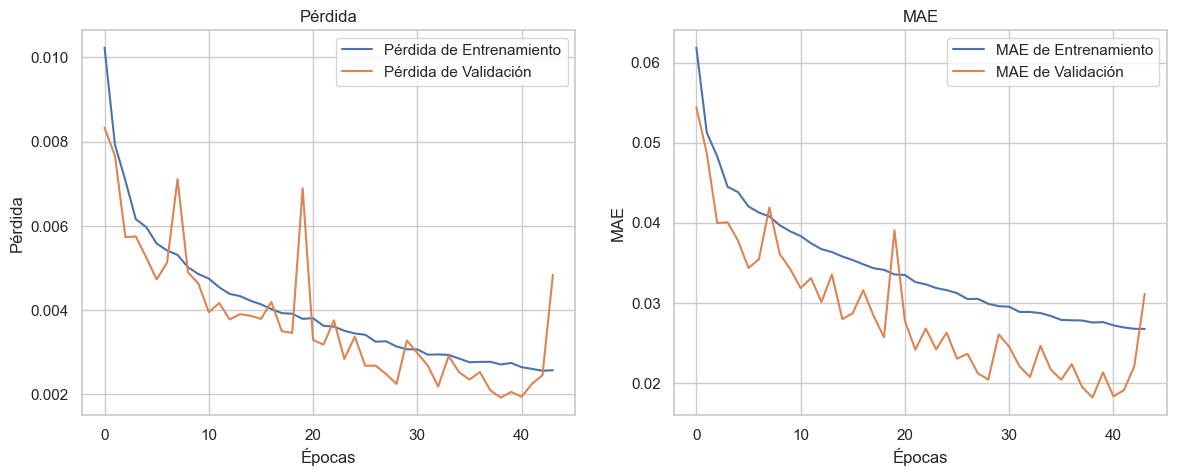

In [87]:
# Ajustar el modelo con el Early Stopping
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping],
                    verbose=1)

# Pérdida de entrenamiento y validación
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.title('MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()


Entrenamiento del modelo

4515/4515 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
   Valor Real  Predicción
0   32.000618   31.855225
1   34.423443   37.234032
2   32.000320   31.949448
3   36.697857   35.733273
4   41.708637   42.224743


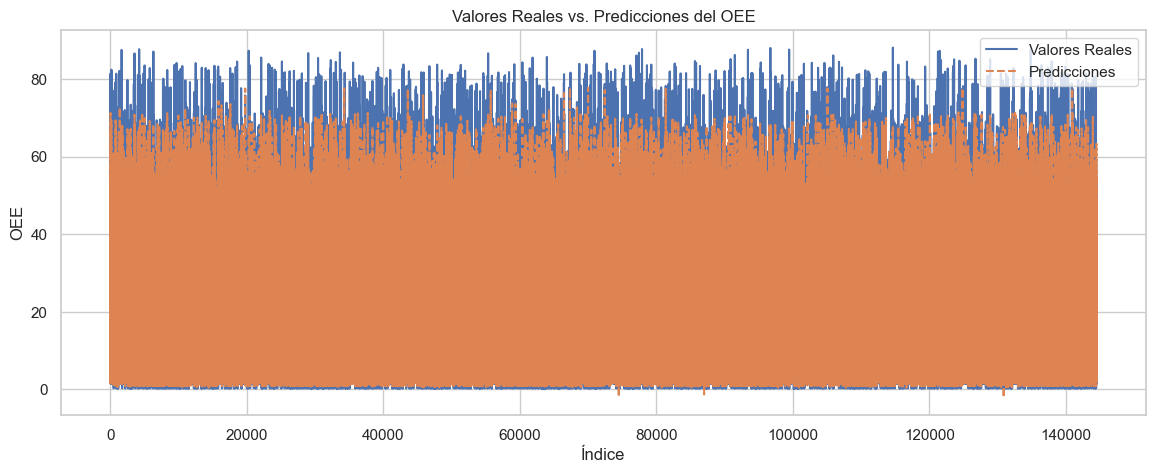

In [88]:
# Realizar predicciones
y_pred_scaled = model.predict(X_test)

# Invertir el escalado para obtener los valores originales
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test)

# Comparar resultados
results = pd.DataFrame({'Valor Real': y_test_original.flatten(), 'Predicción': y_pred.flatten()})
print(results.head())

# Visualizar comparativa
plt.figure(figsize=(14, 5))
plt.plot(results['Valor Real'], label='Valores Reales')
plt.plot(results['Predicción'], label='Predicciones', linestyle='--')
plt.title('Valores Reales vs. Predicciones del OEE')
plt.xlabel('Índice')
plt.ylabel('OEE')
plt.legend()
plt.show()



In [89]:
oee_values = df_oee_limpio['POR_OEE'].values.reshape(-1, 1)

# Normalización
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_oee = scaler.fit_transform(oee_values)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [90]:

# Crear secuencias para LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Definir el número de pasos de tiempo
time_step = 10  # Puedes ajustar este valor


In [92]:
X, y = create_dataset(scaled_oee, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape para LSTM

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [93]:

# Entrenar el modelo
model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_data=(X_test, y_test),  # Validación en el conjunto de prueba
          callbacks=[early_stopping])  # Agregar el callback de Early Stopping

# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


Epoch 1/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 100s 5ms/step - loss: 3.9989e-04 - val_loss: 9.7645e-06
Epoch 2/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - loss: 6.7068e-06 - val_loss: 1.0739e-05
Epoch 3/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - loss: 5.7031e-06 - val_loss: 3.3791e-05
Epoch 4/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - loss: 5.5518e-06 - val_loss: 8.9362e-06
Epoch 5/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - loss: 3.7309e-06 - val_loss: 9.0051e-06
Epoch 6/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - loss: 6.5567e-06 - val_loss: 9.0185e-06
Epoch 7/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 98s 5ms/step - loss: 5.4754e-06 - val_loss: 9.1017e-06
Epoch 8/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 100s 6ms/step - loss: 5.2063e-06 - val_loss: 8.9678e-06
Epoch 9/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 95s 5ms/step - loss: 4.9496e-06 - val_loss: 8.9460e-06
Epoch 10/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 98s 5ms/step - loss: 4.3135e-06 - val_loss: 9.1575e-

ValueError: x and y must have same first dimension, but have shapes (144476,) and (144477, 1)

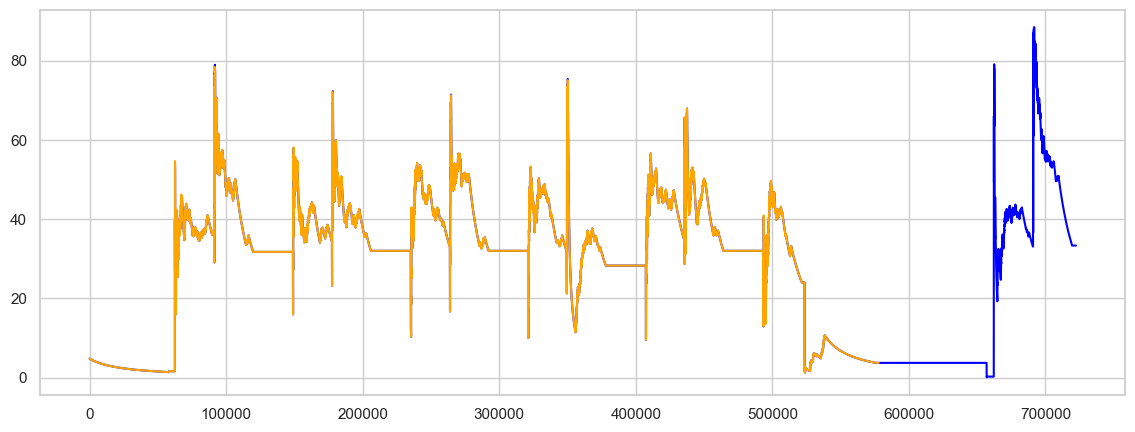

In [94]:

# Visualizar los resultados
plt.figure(figsize=(14, 5))
plt.plot(oee_values, label='Real OEE', color='blue')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='Predicción Entrenamiento', color='orange')
plt.plot(np.arange(time_step + len(train_predict) + 1, len(oee_values) - 1), test_predict, label='Predicción Prueba', color='green')
plt.title('Predicción de OEE con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('OEE')
plt.legend()
plt.show()

# LSTM Unidireccional
Predicción de `POR_OEE` en función de `T_Ciclo_Medio, T_LOG_IN_ACT, T_LOG_OUT_ACT, T_Averia_ACU`

#### 1. Preparación de datos
Para empezar, seleccionamos las columnas relevantes del dataset `df_oee_limpio`, que incluye `T_Ciclo_ACT`, `T_LOG_IN_ACT`, `T_LOG_OUT_ACT`, `T_Averia_ACT` y `POR_OEE`. A continuación, aplicamos un **escalado Min-Max** para normalizar los valores entre 0 y 1, facilitando así el entrenamiento de la LSTM, dado que las redes neuronales suelen converger más eficientemente con datos normalizados.


In [84]:
# Variables de interés
variables = ['T_Ciclo_Medio', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Averia_ACU', 'POR_OEE']

# Selecciona las columnas relevantes en el dataset
data = df_oee[variables].copy()

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


#### 2. Secuencias temporales
Utilizamos una **ventana deslizante** de longitud `n_steps` (en este caso, 30 pasos) para construir secuencias temporales que servirán de entrada al modelo; de este modo, el modelo puede capturar la dinámica de cada variable a lo largo del tiempo. La secuencia temporal incluye todos los valores de entrada en las posiciones anteriores, mientras que `POR_OEE` en la posición actual es el objetivo de predicción.

In [85]:

# Parámetros para la secuencia de tiempo
n_steps = 30  # Número de pasos en la secuencia
X, y = [], []

# Creación de secuencias de entrenamiento y etiquetas
for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :-1])  # Variables predictoras
    y.append(data_scaled[i, -1])  # POR_OEE como variable objetivo


#### 3. División de datos
Separamos los datos en conjuntos de **entrenamiento y prueba** (80% y 20%, respectivamente) para evaluar la generalización del modelo en datos no vistos.


In [86]:

X, y = np.array(X), np.array(y)

# División en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))  # 80% para entrenamiento, 20% para prueba
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


#### 4. Construcción del modelo
Se define un **modelo LSTM unidireccional** simple con 50 unidades en la capa LSTM, seguido de una capa densa para la salida. Utilizamos el optimizador **Adam** para el ajuste de los pesos del modelo y **mse** (mean squared error) como la función de pérdida, dado que se trata de un problema de regresión.


In [87]:

# Construcción del modelo LSTM unidireccional
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()


c:\Users\t32p1tx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

#### 5. Early Stopping
Para evitar el sobreajuste, utilizamos **EarlyStopping** con una paciencia de 10 épocas; esto significa que el entrenamiento se detendrá si no se observa una mejora en la pérdida de validación durante 10 épocas consecutivas, restaurando los mejores pesos logrados hasta ese momento.


In [88]:

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


#### 6. Predicción y visualización
Finalmente, hacemos **predicciones** sobre el conjunto de prueba y desescalamos los resultados para compararlos con los valores reales de `POR_OEE`. Los resultados se visualizan en un gráfico donde la **línea azul** representa el valor real y la **línea roja** muestra la predicción, permitiéndonos ver la precisión del modelo visualmente.

Epoch 1/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - loss: 0.0059 - val_loss: 0.0254
Epoch 2/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step - loss: 0.0025 - val_loss: 0.1738
Epoch 3/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 0.0024 - val_loss: 0.0805
Epoch 4/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - loss: 0.0022 - val_loss: 0.0156
Epoch 5/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - loss: 0.0020 - val_loss: 0.0414
Epoch 6/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - loss: 0.0020 - val_loss: 0.0171
Epoch 7/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - loss: 0.0019 - val_loss: 0.0157
Epoch 8/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - loss: 0.0018 - val_loss: 0.0195
Epoch 9/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - loss: 0.0203 - val_loss: 0.0127
Epoch 10/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 90s 5ms/step - loss: 0.0018 - val_loss: 0.0125
Epoch 11/100
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 168.9641 - v

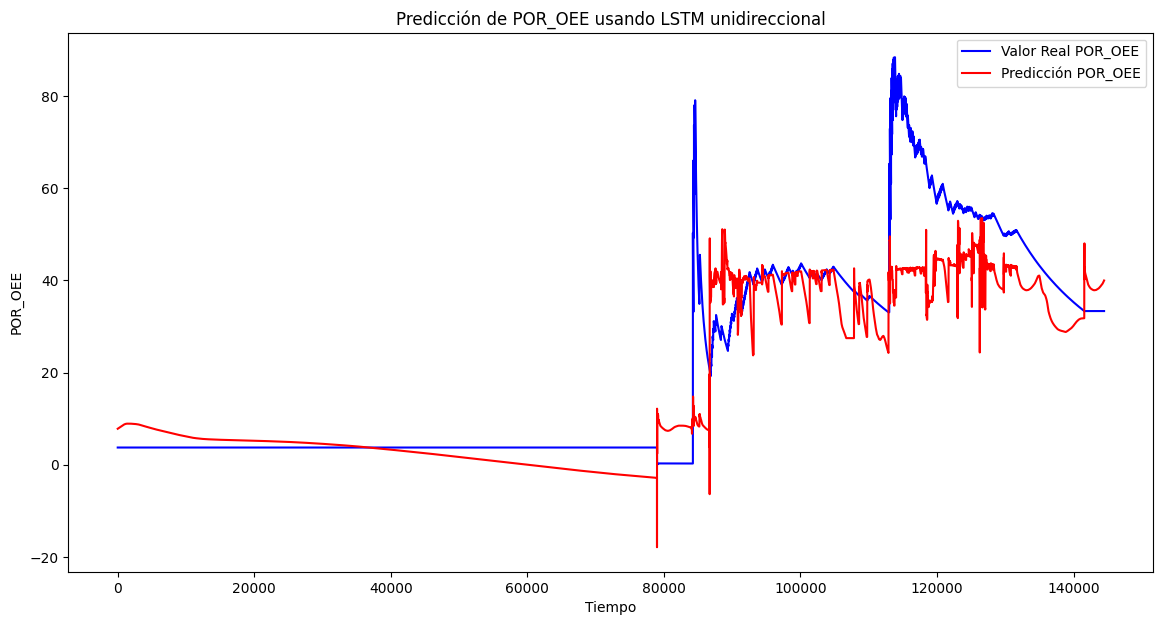

In [89]:

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desescalado de los resultados
y_test_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_test.shape[0], X.shape[2])), y_test])[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_pred.shape[0], X.shape[2])), y_pred])[:, -1]

# Visualización de los resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Valor Real POR_OEE', color='blue')
plt.plot(y_pred_rescaled, label='Predicción POR_OEE', color='red')
plt.xlabel('Tiempo')
plt.ylabel('POR_OEE')
plt.legend()
plt.title('Predicción de POR_OEE usando LSTM unidireccional')
plt.show()


#### 7. Guardar modelo

In [90]:
# Guardar el modelo en un archivo .keras
model.save("models/modelo_lstm1_oee.keras")

#### 8. Graficar pérdida de entranamiento y validación

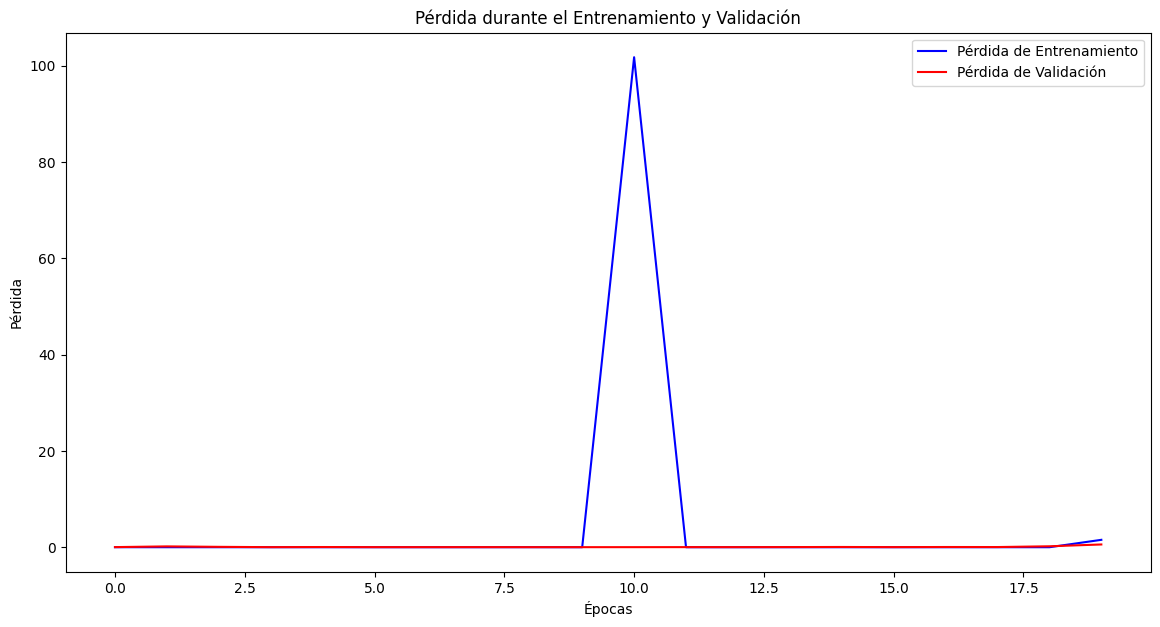

In [92]:
# Graficar la pérdida
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de Validación', color='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.legend()
plt.show()


#### 9. Métricas
Supongamos que ya hemos entrenado nuestro modelo. Más tarde deseamos analizar los resultados y debemos cargar el archivo guardado .keras y volver a hacer todo el proceso

4515/4515 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step
RMSE: 9.5081
MAE: 9.5081
R²: 9.5081


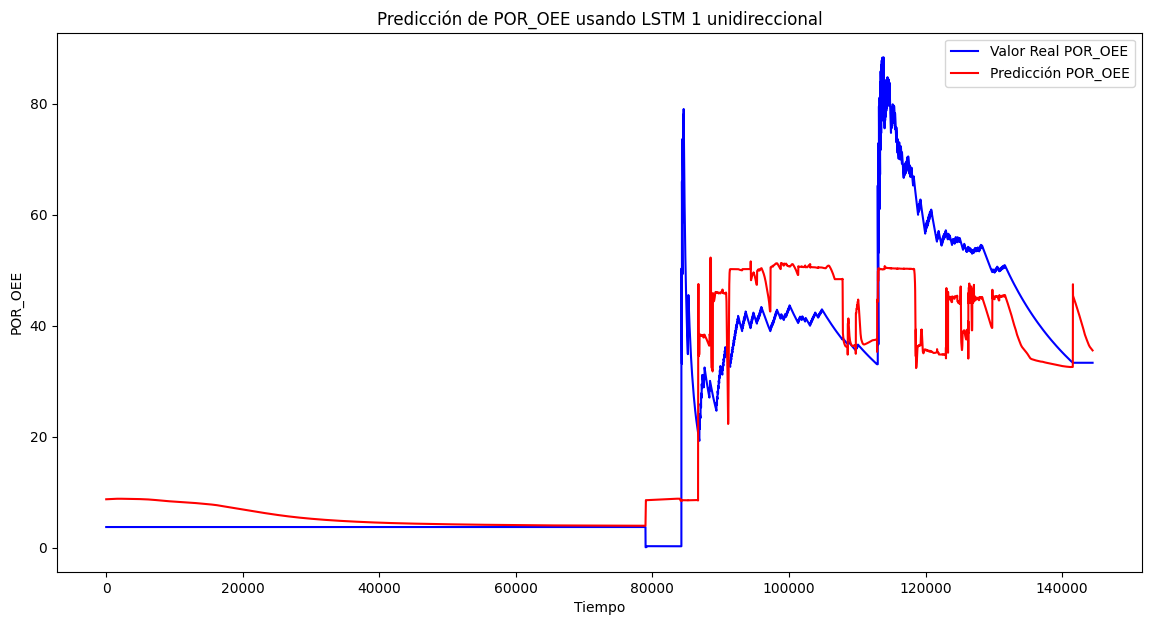

In [70]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


# 1. Cargar el modelo
model = load_model("models/modelo_lstm1_oee.keras")

# 2. Preparar los datos
# Aquí asumimos que df_oee_limpio ya está definido
variables = ['T_Ciclo_Medio', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Averia_ACU', 'POR_OEE']
data = df_oee[variables].copy()

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Crear secuencias temporales
n_steps = 30  # Número de pasos en la secuencia
X, y = [], []

for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :-1])  # Variables predictoras
    y.append(data_scaled[i, -1])  # POR_OEE como variable objetivo

X, y = np.array(X), np.array(y)

# 4. Dividir datos en conjunto de prueba (80% entrenamiento, 20% prueba)
split = int(0.8 * len(X))  # 80% para entrenamiento, 20% para prueba
X_test, y_test = X[split:], y[split:]

# 5. Realizar predicciones
y_pred = model.predict(X_test)

# 6. Desescalar los resultados
y_test_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_test.shape[0], X.shape[2])), y_test])[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_pred.shape[0], X.shape[2])), y_pred])[:, -1]

# 7. Calcular métricas de evaluación
rmse_lstm1 = root_mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae_lst1 = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2_lstm1 = r2_score(y_test_rescaled, y_pred_rescaled)

# Imprimir resultados
print(f"RMSE: {rmse_lstm1:.4f}")
print(f"MAE: {rmse_lstm1:.4f}")
print(f"R²: {rmse_lstm1:.4f}")

# 8. Visualización de resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Valor Real POR_OEE', color='blue')
plt.plot(y_pred_rescaled, label='Predicción POR_OEE', color='red')
plt.xlabel('Tiempo')
plt.ylabel('POR_OEE')
plt.legend()
plt.title('Predicción de POR_OEE usando LSTM 1 unidireccional')
plt.show()

4515/4515 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step
RMSE: 9.5081
MAE: 6.0036
R²: 0.8148


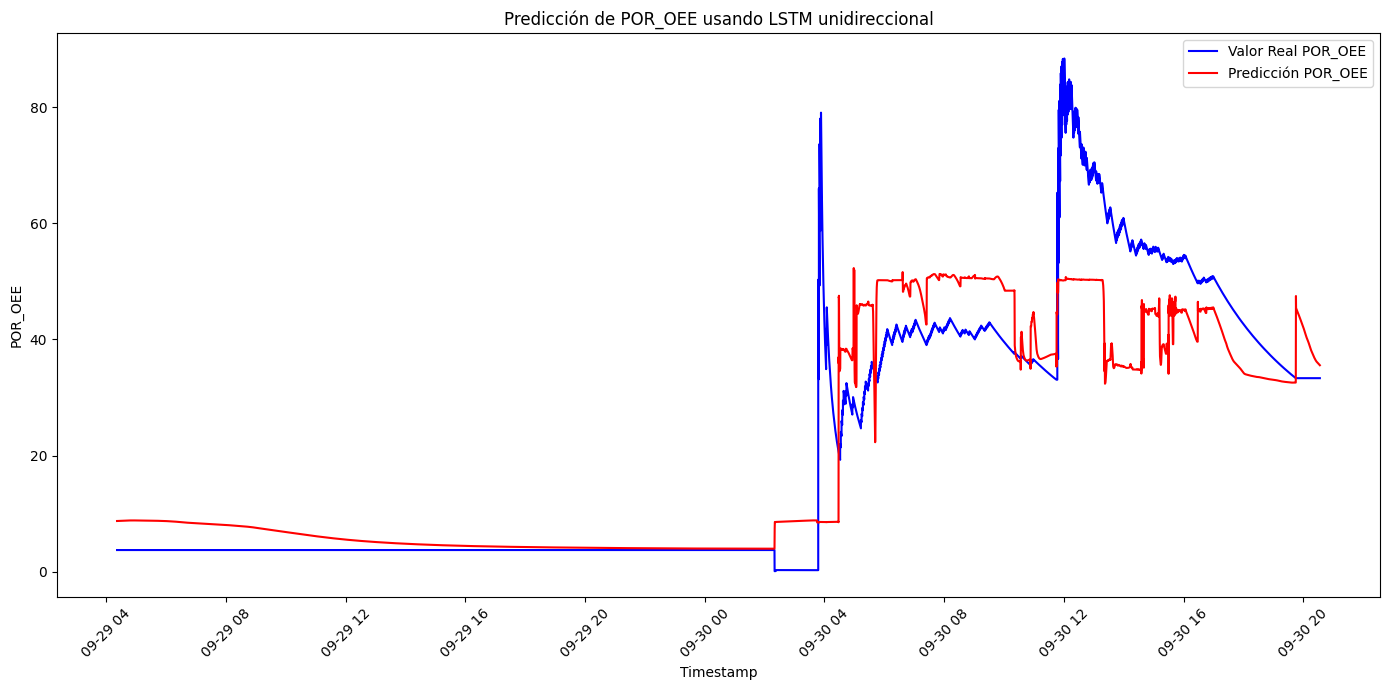

In [76]:
# 1. Cargar el modelo
model = load_model("models/modelo_lstm1_oee.keras")

# 2. Preparar los datos
variables = ['T_Ciclo_Medio', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Averia_ACU', 'POR_OEE']
data = df_oee[variables].copy()

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Crear secuencias temporales
n_steps = 30  # Número de pasos en la secuencia
X, y = [], []

for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :-1])  # Variables predictoras
    y.append(data_scaled[i, -1])  # POR_OEE como variable objetivo

X, y = np.array(X), np.array(y)

# 4. Dividir datos en conjunto de prueba (80% entrenamiento, 20% prueba)
split = int(0.8 * len(X))  # 80% para entrenamiento, 20% para prueba
X_test, y_test = X[split:], y[split:]

# 5. Obtener los timestamps correspondientes para el conjunto de prueba
timestamps = df_oee['_time'].values[n_steps:][split:]

# 6. Realizar predicciones
y_pred = model.predict(X_test)

# 7. Desescalar los resultados
y_test_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_test.shape[0], X.shape[2])), y_test])[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_pred.shape[0], X.shape[2])), y_pred])[:, -1]

# 8. Calcular métricas de evaluación
rmse = root_mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Imprimir resultados
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 9. Visualización de resultados con timestamps
plt.figure(figsize=(14, 7))
plt.plot(timestamps, y_test_rescaled, label='Valor Real POR_OEE', color='blue')
plt.plot(timestamps, y_pred_rescaled, label='Predicción POR_OEE', color='red')
plt.xlabel('Timestamp')
plt.ylabel('POR_OEE')
plt.legend()
plt.title('Predicción de POR_OEE usando LSTM unidireccional')
plt.xticks(rotation=45)  # Rotar los timestamps para mejor legibilidad
plt.tight_layout()  # Ajustar el layout
plt.show()

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# 1. Cargar el modelo
model = load_model("models/modelo_lstm1_oee.keras")

# 2. Preparar los datos
variables = ['T_Ciclo_Medio', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Averia_ACU', 'POR_OEE']
data = df_oee[variables].copy()

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Crear secuencias temporales para todo el dataset
n_steps = 30  # Número de pasos en la secuencia
X, y = [], []

for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :-1])  # Variables predictoras
    y.append(data_scaled[i, -1])  # POR_OEE como variable objetivo

X = np.array(X)

# 4. Realizar predicciones sobre el dataset existente
num_filas_a_predecir = len(data_scaled)  # Número de filas a predecir
predicciones = []

# Usar las últimas n_steps del dataset como entrada inicial
input_seq = X[-1]  # Última secuencia de entrada
input_seq = input_seq.reshape(1, n_steps, -1)  # Asegurar que tenga la forma correcta

for _ in range(num_filas_a_predecir):
    pred = model.predict(input_seq)  # Predicción
    predicciones.append(pred[0][0])  # Guardar la predicción

    # Desplazar la secuencia de entrada
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, -1), axis=1)  # Desplazar y añadir la nueva predicción

# 5. Desescalar las predicciones
predicciones_rescaled = scaler.inverse_transform(np.c_[np.zeros((len(predicciones), X.shape[2])), predicciones])[:, -1]

# 6. Crear un DataFrame de las predicciones
fechas = pd.date_range(start=data.index[-1] + pd.Timedelta(seconds=1), periods=len(predicciones), freq='T')  # Cambia 'T' según la frecuencia
df_predicciones = pd.DataFrame({'timestamp': fechas, 'POR_OEE': predicciones_rescaled})

# 7. Unir datos originales y predicciones
df_resultado = pd.concat([data.reset_index(), df_predicciones], ignore_index=True)

# 8. Visualización de resultados
plt.figure(figsize=(14, 5))
plt.plot(df_resultado['timestamp'], df_resultado['POR_OEE'], label='Valores Históricos + Predicciones', color='blue')
plt.axvline(x=data.index[-1], color='red', linestyle='--', label='Inicio de Predicciones')
plt.plot(fechas, predicciones_rescaled, label='Predicción Total', color='orange')
plt.title('Predicción de OEE con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('OEE')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 4 and the array at index 1 has size 1

# LSTM 2 Unidireccional 
Predicción de `POR_OEE` en función de `T_Ciclo_Medio, T_LOG_IN_ACT, T_LOG_OUT_ACT, T_Averia_ACU`

#### 1. Preparación de datos

In [35]:
# Variables de interés
variables = ['T_Ciclo_Medio', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Averia_ACU', 'POR_OEE']

# Selecciona las columnas relevantes en el dataset
data = df_oee[variables].copy()

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

#### 2. Secuencias temporales
Aqui se cambian los pasos de la secuencia a 20 para evaluar como impacta esto en el rendimeinto del modelo
Se supone que si reducimos el plazo obtendremos un entrenamiento más rápido y este se podrá nutrir y capturas dinámicas de variables en periodos más cortos, ya que los patrones que podamos tener no son largos en el tiempo

In [36]:

# Parámetros para la secuencia de tiempo
n_steps = 20  # Número de pasos en la secuencia
X, y = [], []

# Creación de secuencias de entrenamiento y etiquetas
for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :-1])  # Variables predictoras
    y.append(data_scaled[i, -1])  # POR_OEE como variable objetivo

#### 3. División de datos
Separamos los datos en conjuntos de **entrenamiento y prueba** (80% y 20%, respectivamente) para evaluar la generalización del modelo en datos no vistos.

In [37]:

X, y = np.array(X), np.array(y)

# División en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))  # 80% para entrenamiento, 20% para prueba
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


#### 4. Construcción del modelo (Red compleja con mayor número de capas y dropout) 

In [38]:
# Construcción del modelo LSTM complejo
model = Sequential()

# Capa LSTM de entrada
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, X.shape[2])))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste

# Segunda capa LSTM
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Capa LSTM adicional (opcional)
model.add(LSTM(25, activation='relu'))
model.add(Dropout(0.2))

# Capa densa de salida
model.add(Dense(1))

# Compilación del modelo
model.compile(optimizer='adam', loss='mse')

# Resumen del modelo
model.summary()

c:\Users\t32p1tx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 20, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,826 (311.82 KB)

 Trainable params: 79,826 (311.82 KB)

 Non-trainable params: 0 (0.00 B)

#### 5. Early Stopping

In [43]:
# Cambiamos el early stopping a 20 para ver como converge el modelo
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#### 6. Predicción y visualización

Epoch 1/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 216s 12ms/step - loss: 0.0032 - val_loss: 0.0204
Epoch 2/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 213s 12ms/step - loss: 0.0031 - val_loss: 0.0186
Epoch 3/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 214s 12ms/step - loss: 0.0027 - val_loss: 0.0134
Epoch 4/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 214s 12ms/step - loss: 0.0026 - val_loss: 0.0181
Epoch 5/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 215s 12ms/step - loss: 0.0026 - val_loss: 0.0229
Epoch 6/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 213s 12ms/step - loss: 0.0025 - val_loss: 0.0128
Epoch 7/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 212s 12ms/step - loss: 0.0024 - val_loss: 0.0124
Epoch 8/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 212s 12ms/step - loss: 0.0024 - val_loss: 0.0167
Epoch 9/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 222s 12ms/step - loss: 0.0023 - val_loss: 0.0182
Epoch 10/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 219s 12ms/step - loss: 0.0023 - val_loss: 0.0179
Epoch 11/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 216s 12ms/ste

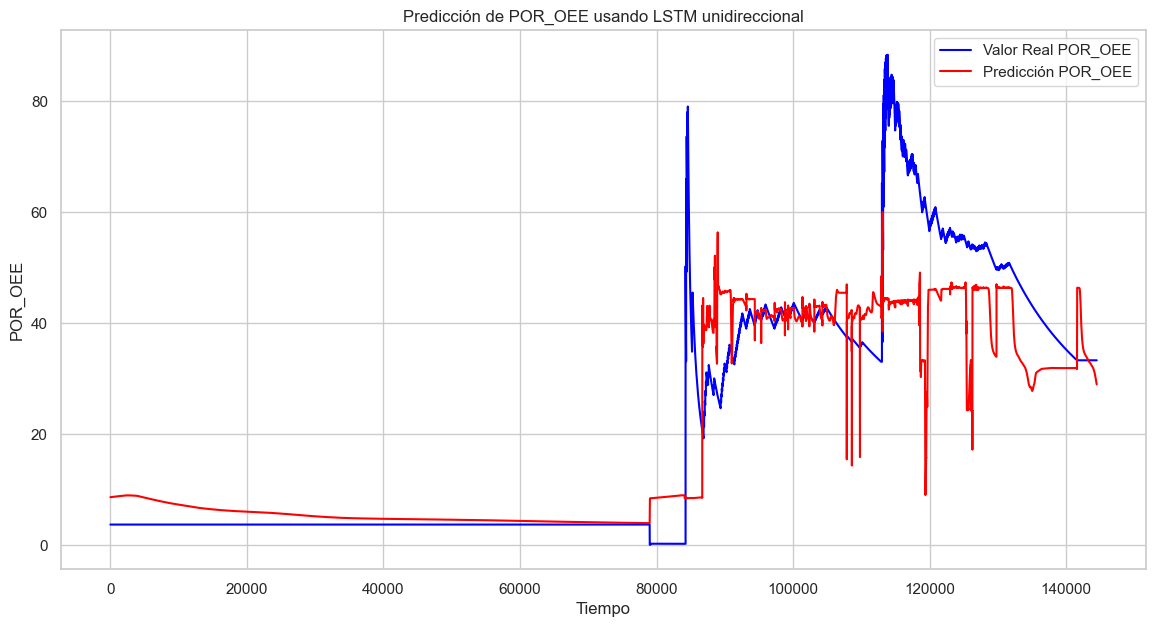

In [44]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desescalado de los resultados
y_test_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_test.shape[0], X.shape[2])), y_test])[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.c_[np.zeros((y_pred.shape[0], X.shape[2])), y_pred])[:, -1]

# Visualización de los resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Valor Real POR_OEE', color='blue')
plt.plot(y_pred_rescaled, label='Predicción POR_OEE', color='red')
plt.xlabel('Tiempo')
plt.ylabel('POR_OEE')
plt.legend()
plt.title('Predicción de POR_OEE usando LSTM unidireccional')
plt.show()


#### 7. Guardar modelo

In [45]:
# Guardar el modelo en un archivo .keras
model.save("models/modelo_lstm2_oee.keras")

#### 8. Graficar pérdida de entranamiento y validación

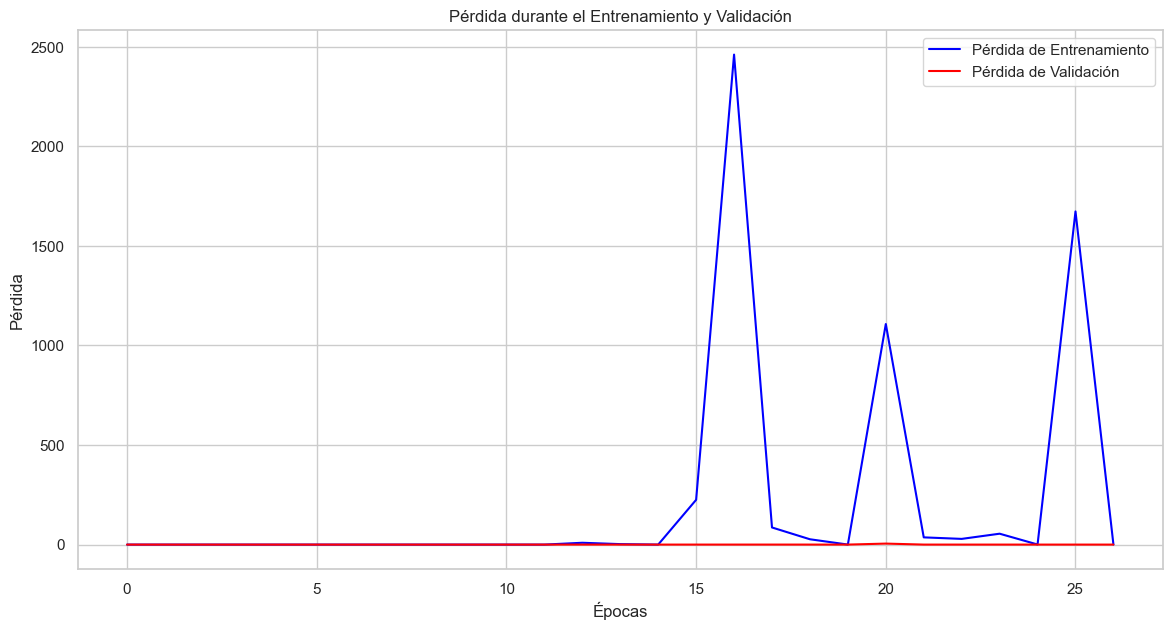

In [46]:
# Graficar la pérdida
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de Validación', color='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.legend()
plt.show()


# Gated Recurrent Units (GRU) 
Predicción de `POR_OEE` en función de `T_Ciclo_Medio, T_LOG_IN_ACT, T_LOG_OUT_ACT, T_Averia_ACU`
Las GRU son una variante de las LSTM y, en muchos casos, pueden ser más eficientes al tener una estructura ligeramente más simple, lo que puede resultar en tiempos de entrenamiento más rápidos y menos riesgo de sobreajuste.

#### 1. Preparación de datos

In [54]:
from tensorflow.keras.layers import GRU
# Variables de interés
variables = ['T_Ciclo_Medio', 'T_LOG_IN_ACT', 'T_LOG_OUT_ACT', 'T_Averia_ACU', 'POR_OEE']

# Selecciona las columnas relevantes en el dataset
data = df_oee_limpio[variables].copy()

# Escalado de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

#### 2. Secuencias temporales
Aqui se cambian los pasos de la secuencia a 20 para evaluar como impacta esto en el rendimeinto del modelo
Se supone que si reducimos el plazo obtendremos un entrenamiento más rápido y este se podrá nutrir y capturas dinámicas de variables en periodos más cortos, ya que los patrones que podamos tener no son largos en el tiempo

In [55]:

# Parámetros para la secuencia de tiempo
n_steps = 20  # Número de pasos en la secuencia
X, y = [], []

# Creación de secuencias de entrenamiento y etiquetas
for i in range(n_steps, len(data_scaled)):
    X.append(data_scaled[i - n_steps:i, :-1])  # Variables predictoras
    y.append(data_scaled[i, -1])  # POR_OEE como variable objetivo

#### 3. División de datos
Separamos los datos en conjuntos de **entrenamiento y prueba** (80% y 20%, respectivamente) para evaluar la generalización del modelo en datos no vistos.

In [56]:

X, y = np.array(X), np.array(y)

# División en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))  # 80% para entrenamiento, 20% para prueba
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


#### 4. Construcción del modelo (GRU) 

In [57]:
# Construcción del modelo GRU
model = Sequential()

# Capa GRU de entrada
model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps, X.shape[2])))
model.add(Dropout(0.2))  # Dropout para evitar sobreajuste

# Segunda capa GRU
model.add(GRU(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Capa GRU adicional (opcional)
model.add(GRU(25, activation='relu'))
model.add(Dropout(0.2))

# Capa densa de salida
model.add(Dense(1))

# Compilación del modelo
model.compile(optimizer='adam', loss='mse')

# Resumen del modelo
model.summary()

c:\Users\t32p1tx\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 20, 100)        │        31,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 20, 50)         │        22,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 25)             │         5,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,401 (235.94 KB)

 Trainable params: 60,401 (235.94 KB)

 Non-trainable params: 0 (0.00 B)

#### 5. Early Stopping

In [53]:
# Cambiamos el early stopping a 20 para ver como converge el modelo
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

#### 6. Predicción y visualización

Epoch 1/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 244s 13ms/step - loss: 0.0068 - val_loss: 0.0114
Epoch 2/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 239s 13ms/step - loss: 0.0033 - val_loss: 0.0223
Epoch 3/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 237s 13ms/step - loss: 0.0030 - val_loss: 0.0193
Epoch 4/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 237s 13ms/step - loss: 0.0029 - val_loss: 0.0166
Epoch 5/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 238s 13ms/step - loss: 0.0027 - val_loss: 0.0152
Epoch 6/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 238s 13ms/step - loss: 0.0026 - val_loss: 0.0161
Epoch 7/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 238s 13ms/step - loss: 0.0026 - val_loss: 0.0160
Epoch 8/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 238s 13ms/step - loss: 1.6335 - val_loss: 0.1613
Epoch 9/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 241s 13ms/step - loss: 0.6003 - val_loss: 0.0443
Epoch 10/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 250s 14ms/step - loss: 0.0376 - val_loss: 0.0151
Epoch 11/200
18060/18060 ━━━━━━━━━━━━━━━━━━━━ 248s 14ms/ste

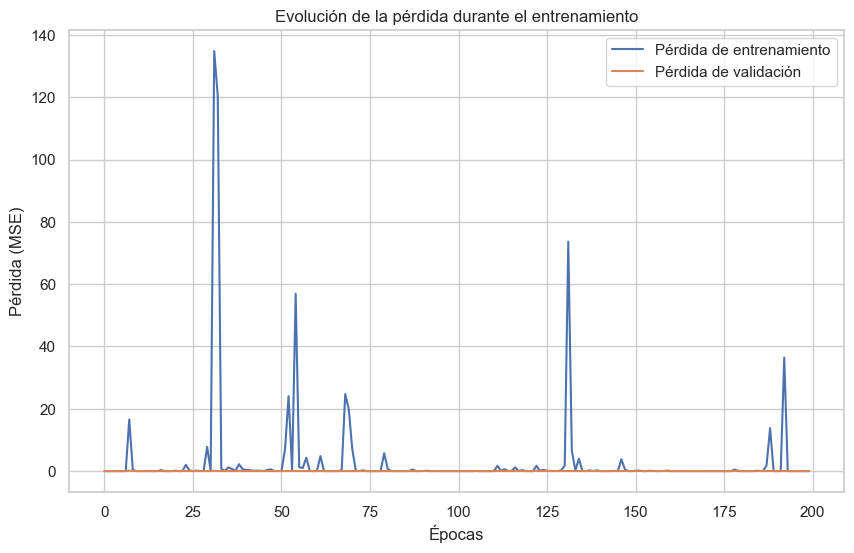

In [58]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predicciones
y_pred = model.predict(X_test)

# Gráfico de la pérdida durante el entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()


#### 7. Guardar modelo

In [59]:
# Guardar el modelo en un archivo .keras
model.save("models/modelo_gru_oee.keras")

#### 8. Graficar pérdida de entranamiento y validación

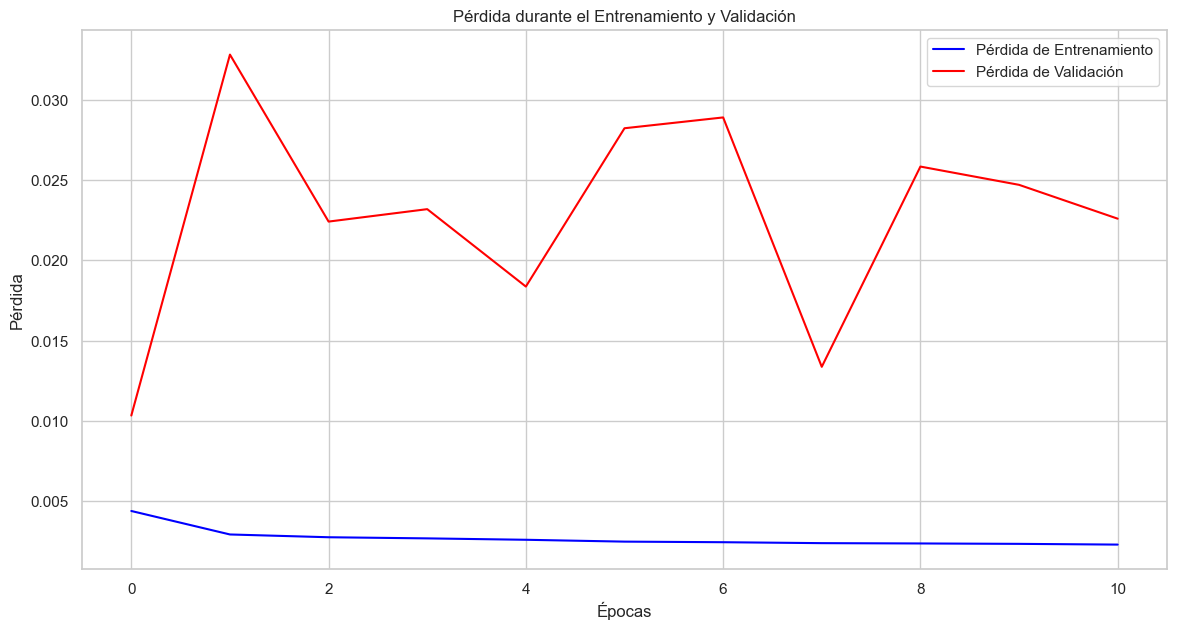

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de Validación', color='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.legend()
plt.show()


# Cargar modelo y graficar predicción

In [61]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model('models/modelo_gru_oee.keras')  # Asegúrate de especificar la ruta correcta

In [63]:
# Realizar las predicciones para entrenamiento y prueba
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


18060/18060 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step


In [71]:
# Crear un array con el mismo número de columnas que los datos originales y solo insertar la predicción en la columna correcta
train_predict_expanded = np.zeros((len(train_predict), data_scaled.shape[1]))
test_predict_expanded = np.zeros((len(test_predict), data_scaled.shape[1]))

# Insertar las predicciones de POR_OEE en la columna correspondiente
train_predict_expanded[:, 0] = train_predict[:, 0]
test_predict_expanded[:, 0] = test_predict[:, 0]

# Deshacer la normalización en la columna de POR_OEE únicamente
train_predict_inverse = scaler.inverse_transform(train_predict_expanded)[:, 0]
test_predict_inverse = scaler.inverse_transform(test_predict_expanded)[:, 0]
oee_values_inverse = scaler.inverse_transform(data_scaled)[:, 0]

In [72]:
# Deshacer la normalización
train_predict_inverse = scaler.inverse_transform(train_predict_expanded)[:, 0]  # Extraemos solo la columna `POR_OEE`
test_predict_inverse = scaler.inverse_transform(test_predict_expanded)[:, 0]    # Extraemos solo la columna `POR_OEE`

# También desnormalizamos los valores reales de `POR_OEE`
oee_values_inverse = scaler.inverse_transform(data_scaled)[:, 0]


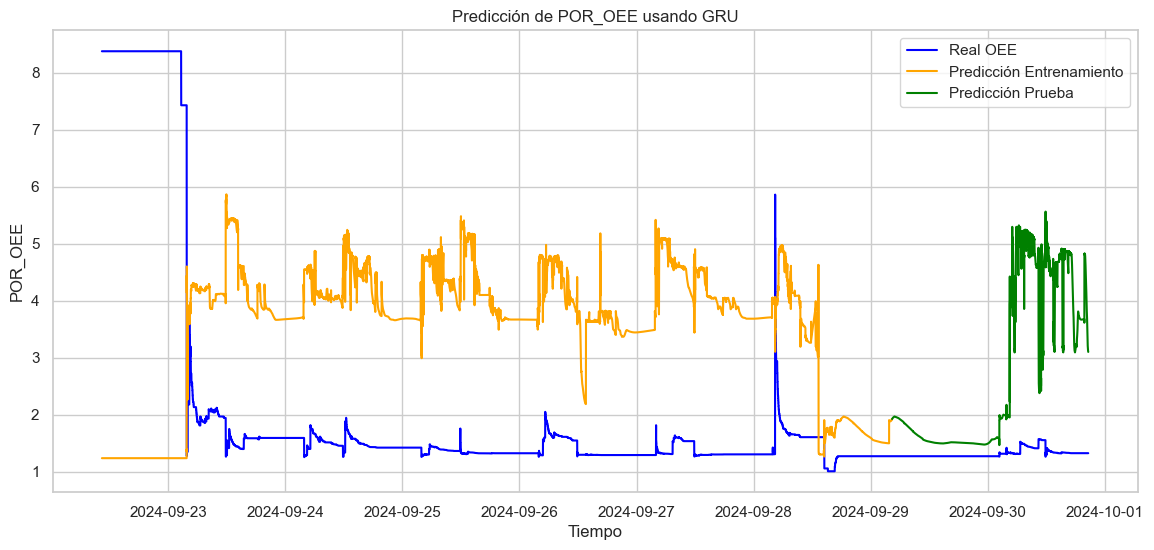

In [73]:
# Usar la columna de tiempo en el eje X
train_time = df_oee['_time'][:len(train_predict)]
test_time = df_oee['_time'][len(train_predict) + n_steps:len(train_predict) + n_steps + len(test_predict)]

# Visualizar los resultados
plt.figure(figsize=(14, 6))
plt.plot(df_oee['_time'], oee_values_inverse, label='Real OEE', color='blue')
plt.plot(train_time, train_predict_inverse, label='Predicción Entrenamiento', color='orange')
plt.plot(test_time, test_predict_inverse, label='Predicción Prueba', color='green')
plt.title('Predicción de POR_OEE usando GRU')
plt.xlabel('Tiempo')
plt.ylabel('POR_OEE')
plt.legend()
plt.show()


In [ ]:

# Deshacer la normalización (si tus datos estaban normalizados)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
oee_values = scaler.inverse_transform(oee_values) # Transformar los valores reales si estaban normalizados

In [ ]:
# Extraer las columnas de tiempo para los conjuntos de entrenamiento y prueba
train_time = df_oee['_time'][:len(train_predict)]
test_time = df_oee['_time'][len(train_predict) + time_step:len(train_predict) + time_step + len(test_predict)]

# Visualizar los resultados
plt.figure(figsize=(14, 6))
plt.plot(df_oee['_time'], oee_values, label='Real OEE', color='blue')
plt.plot(train_time, train_predict, label='Predicción Entrenamiento', color='orange')
plt.plot(test_time, test_predict, label='Predicción Prueba', color='green')
plt.title('Predicción de POR_OEE usando GRU')
plt.xlabel('Tiempo')
plt.ylabel('POR_OEE')
plt.legend()
plt.show()


18060/18060 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step


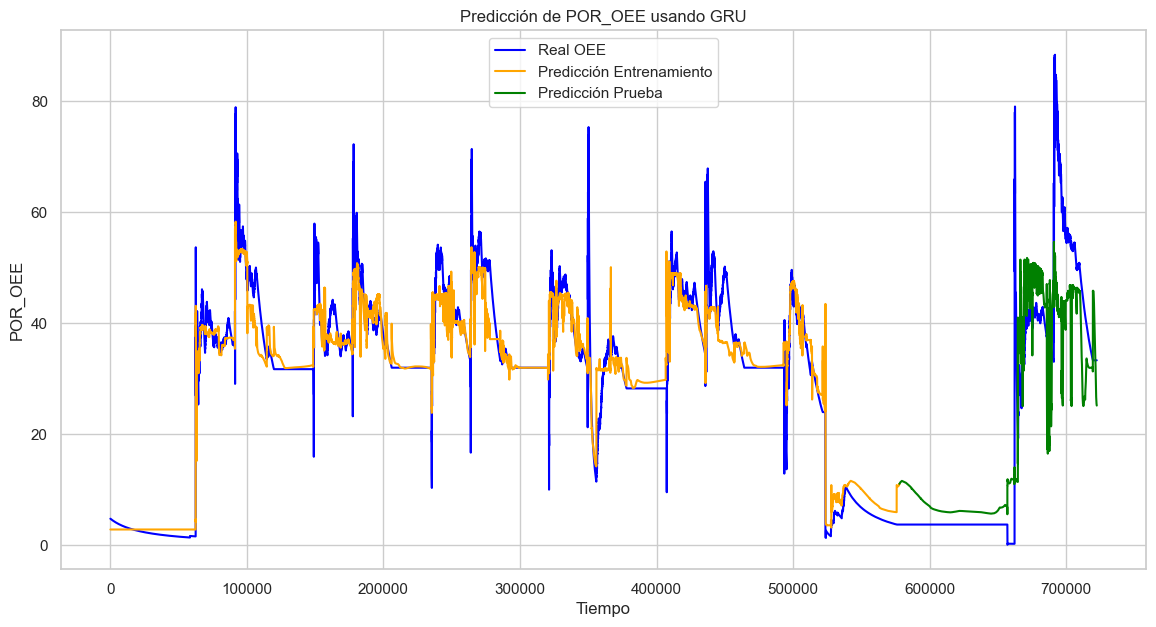

In [75]:
# Cargar el modelo si ya está guardado
model = load_model("models/modelo_gru_oee.keras")

# Predicciones en datos de entrenamiento y prueba
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Crear arreglos de la misma forma que los datos originales para desescalar solo POR_OEE
train_predict_expanded = np.zeros((len(train_predict), data_scaled.shape[1]))
test_predict_expanded = np.zeros((len(test_predict), data_scaled.shape[1]))
oee_values_expanded = np.zeros((len(data_scaled), data_scaled.shape[1]))

# Insertar las predicciones y valores reales de POR_OEE en la columna correspondiente
train_predict_expanded[:, -1] = train_predict[:, 0]
test_predict_expanded[:, -1] = test_predict[:, 0]
oee_values_expanded[:, -1] = data_scaled[:, -1]

# Desescalar los valores de POR_OEE para cada conjunto
train_predict_inverse = scaler.inverse_transform(train_predict_expanded)[:, -1]
test_predict_inverse = scaler.inverse_transform(test_predict_expanded)[:, -1]
oee_values_inverse = scaler.inverse_transform(oee_values_expanded)[:, -1]

# Ajuste del tiempo a partir de n_steps
time = df_oee_limpio.index[n_steps:]

# Asegura que todos los arreglos tengan la misma longitud
min_len = min(len(time), len(oee_values_inverse))
time = time[:min_len]
oee_values_inverse = oee_values_inverse[:min_len]

# Ajuste para las predicciones de entrenamiento y prueba
train_predict_inverse = train_predict_inverse[:len(time)]
test_predict_inverse = test_predict_inverse[:len(time) - len(train_predict_inverse)]

# Graficar los valores reales y las predicciones
plt.figure(figsize=(14, 7))

# Valores reales de POR_OEE
plt.plot(time, oee_values_inverse, label="Real OEE", color="blue")

# Predicciones de entrenamiento
plt.plot(time[:len(train_predict_inverse)], train_predict_inverse, label="Predicción Entrenamiento", color="orange")

# Predicciones de prueba
plt.plot(time[len(train_predict_inverse):], test_predict_inverse, label="Predicción Prueba", color="green")

# Personalizar gráfico
plt.xlabel("Tiempo")
plt.ylabel("POR_OEE")
plt.title("Predicción de POR_OEE usando GRU")
plt.legend()
plt.show()
